Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

** Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard (voir mail) dans le dépôt dont le lien vous a été communiqué par mail. **   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

**Rappel des livrables** :

**BLOC 1,2,3** :
1 fichier colab Notebook "Certification Data analyst - Cas Pratiques" avec les résultats attendus et commentés à l’écrit


**BLOC 4** :

1 Fichier Power Bi

1 Présentation (sous forme .pdf ou .ppt)


Veuillez mettre via le lien de dépôt reçu par mail, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du jury à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

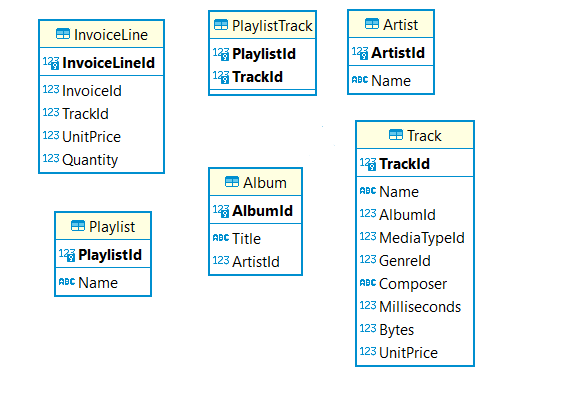

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

# RELATION ENTRE LES TABLES:
- Table PLAYLIST --- Table PLAYLISTTRACK: clé primaire: PLAYLIST[PlaylistID] clé étrangère: PLAYLISTTRACK[PlaylistID]
- Table TRACK --- Table PLAYLISTTRACK: clé primaire: TRACK[TrackID] clé étrangère: PLAYLISTTRACK[TrackID]
- Table ARTIST --- Table ALBUM: clé primaire: ARTIST[ArtistID] clé étrangère: ALBUM[ArtistID]
- Table ALBUM --- table TRACK: clé primaire: ALBUM[AlbumID] clé étrangère: TRACK[AlbumID]


**Réponse :**

> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



**Réponse:**
- oui il existe une table intermédiaire ==> c'est la table PLAYLISTTRACK
- il est recommandé d'avoir une table intermédiaire dans le cas d'une relation PLUSIEURS à PLUSIEURS entre deux tables

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [156]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

In [3]:
# OBJECTIF:
# retourner playlist avec le plus de morceaux
# retourner nombre de morceaux pour cette playlist

# jointures a réaliser d'après la modélisation: playlist ==> playlisttrack ==> track

# fonction aggregation sur playlistID


pd.read_sql("""
            SELECT
                playlist.playlistID,
                playlist.name as nom_playlist,
                COUNT(track.trackID) as nombre_morceaux
            FROM
                playlist
            JOIN
                playlisttrack
                ON
                    playlist.playlistID = playlisttrack.playlistID
            JOIN
                track
                ON
                    playlisttrack.playlistID = track.trackID
            GROUP BY
                playlist.playlistID
            ORDER BY
                nombre_morceaux DESC
            LIMIT
                1
            
            """, conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,1,Music,3290


Résultat attendu:

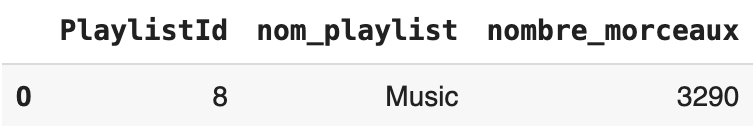

> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

In [4]:
# OBJECTIF
# retourner noms artistes
# retourner nombre morceaux par artiste
# retourner nombre d album par artiste
# retourner ordre DESC par rapport nombre de morceaux

# jointures à realiser d'apres la modelisation: artist ==> album ==> track

pd.read_sql("""
            SELECT
                artist.name as nom_artiste,
                COUNT(track.name) as nombre_morceaux,
                COUNT(DISTINCT album.albumID) as nombre_album
            FROM
                artist
            JOIN
                album
                ON
                    artist.artistID = album.artistID
            JOIN
                track
                ON
                    album.albumID = track.albumID
            GROUP BY
                nom_artiste
            ORDER BY
                nombre_morceaux DESC

            """, conn)

,nom_artiste,nombre_morceaux,nombre_album
0,Iron Maiden,213,21
1,U2,135,10
2,Led Zeppelin,114,14
3,Metallica,112,10
4,Lost,92,4
...,...,...,...
199,"Academy of St. Martin in the Fields, Sir Nevil...",1,1
200,"Academy of St. Martin in the Fields, John Birc...",1,1
201,Academy of St. Martin in the Fields Chamber En...,1,1
202,Aaron Goldberg,1,1


Résultat attendu:

 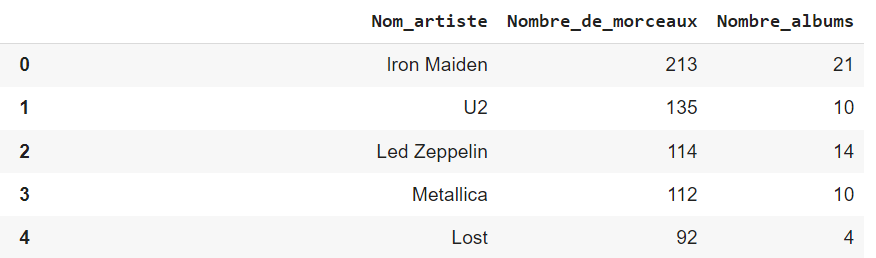

> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

In [5]:
# COUNT et DISTINCT pour compter les morceaux distincts 

pd.read_sql("""
            SELECT
                COUNT(DISTINCT name) as nombre_morceaux_distinct
            FROM
                track
            """,
             conn)

,nombre_morceaux_distinct
0,3257


Résultat attendu:

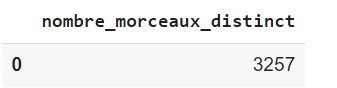

> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

In [6]:
# quel est le genre qui contient le plus de morceaux ?

# fonction aggregation sur genreID
# limit 1 pour afficher le genre qui contient le plus de morceaux

pd.read_sql("""
            SELECT
                genreID,
                COUNT(track.name) as nombre_morceaux
            FROM
                track
            GROUP BY
                GenreID
            LIMIT
                1
            """, conn)

,GenreId,nombre_morceaux
0,1,1297


Résultat attendu :

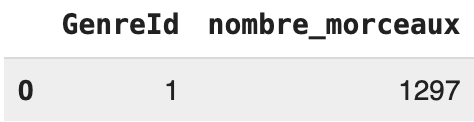

---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**
- RGPD signifie Règlement Général sur la Protection des Données
- c'est un texte règlementaire européen avec pour objectif principal de mieux encadrer le traitement des données
- il permet aux citoyens européens de vérifier et faire valoir leurs droits sur leurs données personnelles

---

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**
- response 200 signifie que la requête qu'il a effectué a réussi, c'est un message renvoyé par un serveur en retour de la demande utilisateur
- response 404 signifie que la requête qu'il a effectué n'a pas réussi, c'est une erreur coté client. L'utilisateur recherche une page introuvable

---


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [7]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [8]:
# bibliotheque nécessaire pour requêter l'API

import requests
from pprint import pprint

In [9]:
# OBJECTIF: je dois récupérer l'adresse de l'appartement grâce aux variables latitude_appartement et longitude_appartement

# 1. je récupère le endpoint depuis l'API
url_test = "https://api-adresse.data.gouv.fr/reverse/?lon=2.37&lat=48.357"

# j'affiche l'url pour vérifier que le lien fonctionne
url_test

'https://api-adresse.data.gouv.fr/reverse/?lon=2.37&lat=48.357'

In [10]:
# 2. j'insère les variables latitude et longitude dans cet url
# j'utilise f-string qui permet d'inclure des variables dans l'url

url = f"https://api-adresse.data.gouv.fr/reverse/?&lon={longitude_appartement}&lat={latitude_appartement}"
url

'https://api-adresse.data.gouv.fr/reverse/?&lon=2.337501&lat=48.895622'

In [11]:
# 3. j'affiche les infos du fichier JSON

# je dois utiliser requests.get().json() afin d'afficher les infos du fichier
# cela me renvoie un fichier JSON que je dois utiliser pour récupérer l'adresse de l'appartement

file = requests.get(url).json()
file

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.337614, 48.895555]},
   'properties': {'type': 'housenumber',
    'name': '111 Rue Damrémont',
    'label': '111 Rue Damrémont 75018 Paris',
    'street': 'Rue Damrémont',
    'postcode': '75018',
    'citycode': '75118',
    'city': 'Paris',
    'oldcitycode': None,
    'oldcity': None,
    'district': 'Paris 18e Arrondissement',
    'context': '75, Paris, Île-de-France',
    'importance': 0.80256,
    'housenumber': '111',
    'id': '75118_2534_00111',
    'banId': None,
    'x': 651435.17,
    'y': 6866375.66,
    'distance': 11,
    'score': 0.9989,
    '_type': 'address'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [2.337684, 48.895654]},
   'properties': {'type': 'housenumber',
    'name': '113 Rue Damrémont',
    'label': '113 Rue Damrémont 75018 Paris',
    'street': 'Rue Damrémont',
    'postcode': '75018',
    'citycode': '75118',
    

In [12]:
# 4. je dois parcourir les fichier JSON afin de récupérer les infos
# l'url avec les coordonnées me retournent plusieurs adresses
# je dois donc sélectionner la premiere adresse qui est la plus proche selon les coordonnées envoyées a l'API

# pprint rend beaucoup lisible le fichier json
pprint(file['features'][0])

# json_normalize() sert à transformer le fichier json en dataframe
adresse = pd.json_normalize(file['features'][0])

{'geometry': {'coordinates': [2.337614, 48.895555], 'type': 'Point'},
 'properties': {'_type': 'address',
                'banId': None,
                'city': 'Paris',
                'citycode': '75118',
                'context': '75, Paris, Île-de-France',
                'distance': 11,
                'district': 'Paris 18e Arrondissement',
                'housenumber': '111',
                'id': '75118_2534_00111',
                'importance': 0.80256,
                'label': '111 Rue Damrémont 75018 Paris',
                'name': '111 Rue Damrémont',
                'oldcity': None,
                'oldcitycode': None,
                'postcode': '75018',
                'score': 0.9989,
                'street': 'Rue Damrémont',
                'type': 'housenumber',
                'x': 651435.17,
                'y': 6866375.66},
 'type': 'Feature'}


In [13]:
adresse

,type,geometry.type,geometry.coordinates,properties.type,properties.name,properties.label,properties.street,properties.postcode,properties.citycode,properties.city,...,properties.context,properties.importance,properties.housenumber,properties.id,properties.banId,properties.x,properties.y,properties.distance,properties.score,properties._type
0,Feature,Point,"[2.337614, 48.895555]",housenumber,111 Rue Damrémont,111 Rue Damrémont 75018 Paris,Rue Damrémont,75018,75118,Paris,...,"75, Paris, Île-de-France",0.80256,111,75118_2534_00111,None,651435.17,6866375.66,11,0.9989,address


In [14]:
# j'affiche l'adresse
adresse['properties.label']

0    111 Rue Damrémont 75018 Paris
Name: properties.label, dtype: object

---

# Pandas _(2 heures)_

In [15]:
pd.set_option('display.max_colwidth', 50)

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [16]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


In [17]:
# je commence mon exploration du dataset
# je crée une fonction d'exploration

def fn_exploration(df):
    display(
        df.info(),
        f"valeurs manquantes",
        df.isna().sum(),
        f"describe",
        df.describe(),
        f"dtypes",
        df.dtypes,
        f"value_counts",
        df.value_counts(),
        f"duplicates",
        df.duplicated().sum(),
        f"decribe corr",
        df.describe().corr()
    )

In [18]:
fn_exploration(df_transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                290 non-null    object 
 1   valeur_fonciere            290 non-null    float64
 2   surface_reelle_bati        290 non-null    int64  
 3   prix_m2                    290 non-null    int64  
 4   nombre_pieces_principales  290 non-null    int64  
 5   type_local                 290 non-null    object 
 6   nom_commune                290 non-null    object 
 7   nom_iris                   290 non-null    object 
 8   code_commune               290 non-null    int64  
 9   code_departement           290 non-null    int64  
 10  code_iris                  290 non-null    int64  
 11  id_parcelles               290 non-null    object 
 12  longitude                  290 non-null    float64
 13  latitude                   290 non-null    float64

None

'valeurs manquantes'

id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64

'describe'

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
count,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.0,2.900000e+02,290.000000,290.000000
mean,1.473177e+06,166.324138,10299.355172,2.231034,75113.537931,75.0,7.511407e+08,2.337629,48.863934
std,1.187590e+07,1032.764258,2838.395323,1.127696,4.830011,0.0,5.023655e+04,0.035815,0.020807
min,2.500000e+04,8.000000,2087.000000,0.000000,75101.000000,75.0,7.510102e+08,2.259315,48.823395
25%,2.586650e+05,28.000000,8629.250000,1.000000,75110.000000,75.0,7.511039e+08,2.307900,48.845201
50%,4.214500e+05,44.000000,10000.000000,2.000000,75115.000000,75.0,7.511558e+08,2.341808,48.865904
75%,6.050000e+05,59.000000,11502.250000,3.000000,75117.000000,75.0,7.511768e+08,2.363360,48.882406
max,1.956000e+08,11887.000000,22080.000000,7.000000,75120.000000,75.0,7.512080e+08,2.410449,48.897377


'dtypes'

id_mutation                   object
valeur_fonciere              float64
surface_reelle_bati            int64
prix_m2                        int64
nombre_pieces_principales      int64
type_local                    object
nom_commune                   object
nom_iris                      object
code_commune                   int64
code_departement               int64
code_iris                      int64
id_parcelles                  object
longitude                    float64
latitude                     float64
date_mutation                 object
dtype: object

'value_counts'

id_mutation   valeur_fonciere  surface_reelle_bati  prix_m2  nombre_pieces_principales  type_local   nom_commune               nom_iris             code_commune  code_departement  code_iris  id_parcelles    longitude  latitude   date_mutation
2018-1365805  345909.8         31                   11158    2                          appartement  Paris 8e Arrondissement   Faubourg du Roule 1  75108         75                751083001  75108000AX0015  2.298073   48.877110  2018-01-12       1
2019-1080234  611000.0         56                   10910    2                          appartement  Paris 15e Arrondissement  Javel 13             75115         75                751156013  75115000FX0037  2.282574   48.844067  2019-05-23       1
2019-1075758  442000.0         48                   9208     3                          appartement  Paris 13e Arrondissement  Maison Blanche 17    75113         75                751135117  75113000EH0017  2.342654   48.826496  2019-03-19       1
2019-1075324 

'duplicates'

0

'decribe corr'

,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,code_commune,code_departement,code_iris,longitude,latitude
valeur_fonciere,1.000000,0.999530,0.778570,-0.136534,0.183207,-0.113402,0.183314,-0.153801,-0.131251
surface_reelle_bati,0.999530,1.000000,0.764836,-0.118348,0.153448,-0.103496,0.153559,-0.135793,-0.117907
prix_m2,0.778570,0.764836,1.000000,-0.456851,0.611553,-0.326161,0.611777,-0.470867,-0.389237
nombre_pieces_principales,-0.136534,-0.118348,-0.456851,1.000000,-0.649174,0.951260,-0.650871,0.999801,0.982266
code_commune,0.183207,0.153448,0.611553,-0.649174,1.000000,-0.383700,0.999998,-0.646983,-0.496102
code_departement,-0.113402,-0.103496,-0.326161,0.951260,-0.383700,1.000000,-0.385763,0.952388,0.992160
code_iris,0.183314,0.153559,0.611777,-0.650871,0.999998,-0.385763,1.000000,-0.648685,-0.498042
longitude,-0.153801,-0.135793,-0.470867,0.999801,-0.646983,0.952388,-0.648685,1.000000,0.983025
latitude,-0.131251,-0.117907,-0.389237,0.982266,-0.496102,0.992160,-0.498042,0.983025,1.000000


> 7. **Compétence C2.6** Supprimer les valeurs aberrantes, qui ont une surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [19]:
# je dois afficher les enregistrement pour lesquels la surface est suprieure à 6000 et les sctocker dans un dataframe
# ainsi que de renvoyer le nombre de lignes pour ce dataframe

# je selectionne les enregistrements concernés ==> ma condition
df_transactions[df_transactions['surface_reelle_bati'] > 6000]

# stockage dans df_outliers
df_outliers = df_transactions[df_transactions['surface_reelle_bati'] > 6000]
display(df_outliers)

# nombre de lignes du df_outliers
f"nombre de lignes du df_outliers: {len(df_outliers)}"

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
50,2019-1100210,42101496.0,8290,5078,0,local industriel,Paris 19e Arrondissement,Amerique 21,75119,75,751197521,75119000CY0033,2.392046,48.886800,2019-11-14
113,2019-1084676,195600000.0,11887,16454,0,local industriel,Paris 16e Arrondissement,Porte Dauphine 7,75116,75,751166307,75116000EA0013,2.279492,48.869090,2019-06-25
130,2018-1406579,15414083.0,7385,2087,0,local industriel,Paris 19e Arrondissement,Pont de Flandre 12,75119,75,751197412,75119000BD0023,2.385270,48.896828,2018-06-29
190,2018-1378678,31742400.0,7128,4453,0,local industriel,Paris 11e Arrondissement,Saint-Ambroise 9,75111,75,751114209,75111000AP0010,2.368367,48.862427,2018-06-28


'nombre de lignes du df_outliers: 4'

In [20]:
# suppression des valeurs aberrantes
# j'utilise .drop sur ma condition > 6000

df_transactions = df_transactions.drop(
                df_transactions[df_transactions['surface_reelle_bati'] > 6000].index
                )

In [21]:
# je vérifie que la suppression est bien prise en compte

len(df_transactions[df_transactions['surface_reelle_bati'] > 6000])

0

> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [22]:
# j'utilise les fonctions .isna() et .sum() pour afficher le nomlbre de valeurs manquantes par colonnes

df_transactions.isna().sum()

# il n'y a aucune valeurs manquantes

id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64

> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [23]:
# je dois utiliser la fonction .value_counts() afin de retourner le nombre de valeurs distinctes pour la colonne demandée

df_transactions['type_local'].value_counts()

type_local
appartement    286
Name: count, dtype: int64

> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [24]:
# la condition est la variable "type_local"
# pour laquelle je dois calculer la moyenne de "surface_reelle_bati"
# je dois utiliser la fonction d'aggregation groupby sur "type_local" et calculer la moyenne de "surface_reele_bati"

df_transactions.groupby("type_local")["surface_reelle_bati"].mean()

type_local
appartement    47.356643
Name: surface_reelle_bati, dtype: float64

---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [25]:
adresse = "8 Passage Petit Cerf 75017 Paris"

In [26]:
import re

In [27]:
# 1. je decompose les étapes du regex dans un premier temps

# je dois utiliser .findall afin de trouver le code postal depuis ma variable adresse
# [0-9]+ ==> renvoie touts les chiffres qui se trouve à la suite les uns des autres

regex = re.findall(r'[0-9]+', adresse)

# le résultat est sous forme de liste
print(regex)

# je slice dans cette liste afin d'affciher le code postal ==> index 1
regex[1]

['8', '75017']


'75017'

In [28]:
# 2. je crée ma fonction regex

# ma fonction prend en paramètre adresse

def fn_regex(adresse):

    # instanciation de la variable
    adresse = "8 Passage Petit Cerf 75017 Paris"

    # ici l'expression regex pour récupérer les informations
    regex = re.findall(r'[0-9]+', adresse)

    # ici l'élément que je recherche ==> code postal
    code_postal = regex[1]

    return code_postal

In [29]:
# je vérifie que ma fonction me retourne bien le code postal

fn_regex(adresse)

'75017'

## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**
- Scrum Master: il est le coach de l'équipe Scrum, il agit comme un facilitateur/ garant du cadre auprès de son équipe. Il a pour mission d'organiser, de suivre et de veiller à la bonne application de chaque étape du projet 

- Product Owner: il est le chef de projet dans le cadre de la méthode Agile Scrum, il est l'interface entre l'équipe technique, marketing et les clients. Il a pour mission

---

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [31]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(2)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.87230,2018-01-02
1,2018-1384130,110000.0,12,9166,1,appartement,Paris 14e Arrondissement,Montparnasse 4,75114,75,751145304,75114000AM0068,2.326280,48.83569,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [32]:
# je recherche le nombre de valeurs pour la serie 'type_local
df_transactions['type_local'].value_counts()

type_local
appartement         48921
local industriel     4031
maison                233
Name: count, dtype: int64

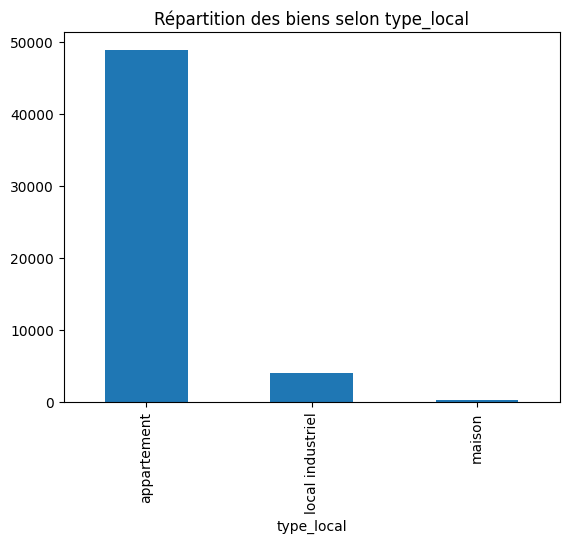

In [33]:
df_transactions['type_local'].value_counts().plot(kind='bar')
plt.title('Répartition des biens selon type_local')
plt.show()

In [34]:
# OBJECTIF: isoler dans un nouveau dataframe les enregistrements de type_local = appartement

# 1. je dois utiliser .loc afin d'isoler les enregistrements depuis df_transactions
df_transactions.loc[df_transactions['type_local'] == 'appartement']

# 2. je stocke le résultat de mon .loc dans une variable
df_flats = df_transactions.loc[df_transactions['type_local'] == 'appartement']

# 3. je vérifie le stockage dans la variable
display(df_flats)
display(df_flats['type_local'].value_counts())

# 4. j'affiche le nombre de lignes avec la fonction .len
f"il y a {len(df_flats)} lignes dans df_flats"

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.872300,2018-01-02
1,2018-1384130,110000.0,12,9166,1,appartement,Paris 14e Arrondissement,Montparnasse 4,75114,75,751145304,75114000AM0068,2.326280,48.835690,2018-01-02
2,2018-1376276,87950.0,9,9772,1,appartement,Paris 11e Arrondissement,Roquette 2,75111,75,751114302,75111000BS0234,2.386354,48.856080,2018-01-02
3,2018-1382007,699000.0,111,6297,6,appartement,Paris 13e Arrondissement,Maison Blanche 18,75113,75,751135118,75113000EI0007,2.343125,48.829746,2018-01-02
4,2018-1376139,251000.0,29,8655,2,appartement,Paris 12e Arrondissement,Picpus 5,75112,75,751124605,75112000BS0026,2.396901,48.834740,2018-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53180,2019-1082721,215000.0,18,11944,1,appartement,Paris 15e Arrondissement,Saint-Lambert 4,75115,75,751155704,75115000AO0027,2.297139,48.830433,2019-12-31
53181,2019-1102358,320905.0,27,11885,1,appartement,Paris 4e Arrondissement,Saint-Gervais 3,75104,75,751041403,75104000AJ0091,2.357617,48.856890,2019-12-31
53182,2019-1102357,201000.0,28,7178,1,appartement,Paris 2e Arrondissement,Bonne Nouvelle 2,75102,75,751020802,75102000AM0151,2.347458,48.865850,2019-12-31
53183,2019-1082682,283650.0,28,10130,1,appartement,Paris 15e Arrondissement,Saint-Lambert 9,75115,75,751155709,75115000BH0015,2.290955,48.835120,2019-12-31


type_local
appartement    48921
Name: count, dtype: int64

'il y a 48921 lignes dans df_flats'

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [35]:
# pour isoler les colonnes demandées, j'utilise .loc ==> toutes les lignes et les colonnes explicitement nommées

df_flats = df_flats.loc[:, ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]

# je vérifie
df_flats

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
0,280000.0,25,2,75120
1,110000.0,12,1,75114
2,87950.0,9,1,75111
3,699000.0,111,6,75113
4,251000.0,29,2,75112
...,...,...,...,...
53180,215000.0,18,1,75115
53181,320905.0,27,1,75104
53182,201000.0,28,1,75102
53183,283650.0,28,1,75115


> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



**Réponse**
- la variable texte que je choisirais pour enrichir notre jeu de données serait "description_du_bien", cela permettrait de connaitre l'état actuel du bien ==> avec par exemple: neuf, bon état, travaux à prévoir
- valeur ajoutée: cela permettrait d'avoir une bonne indication sur l'état du bien et cela pourrait expliquer les variations de prix pour des biens avec des caracteristiques similaires (nombre de pieces équivalente, surface équivalente, nombre de chambres équivalentes, localisation, ...)
- comment proceder pour exploiter la colonne: il faudrait au préalable rattacher chaque valeurs catégorielles à chaque enregistrement du dataframe. il faudrait effectuer une analyse de sentiment deopuis cette colonne.
le workflow dans ce cas serait ==> liste stopwords pour nettoyer le texte/ tokenization des mots pour que le modèle soit performant/ vectorization: application du modele/ machine learning


### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [36]:
# je sélectionne les variables explicatives via mon X
X = df_flats[['surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]

# je vérifie mon X
X.shape

(48921, 3)

In [37]:
# je définis la cible via mon y
y = df_flats['valeur_fonciere']

# je vérifie mon y
y.shape

(48921,)

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [38]:
# OBJECTIF: afin de créer les colonnes depuis code_commune, je dois utiliser .get_dummies()
# cela transformera les arrondissements en valeur numériques 
# et ne donnera pas de poids (valeurs plus importantes que d'autres) aux arrondissements

# 1. je test le .get_dummies() sur ma série
pd.get_dummies(df_flats['code_commune'], dtype='int')

# 2. je stocke dans une variable le resultat de .get_dummies()
arrondissements_dummies = pd.get_dummies(df_flats['code_commune'], dtype='int')

# 3. je vérifie
# display(arrondissements_dummies)

# 4. je dois concaténer les arrondissements dummies avec le df_flats
df_flats = pd.concat([df_flats, arrondissements_dummies], axis=1)

# 5. je vérifie la concaténation
display(df_flats)


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune,75101,75102,75103,75104,75105,75106,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
0,280000.0,25,2,75120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,110000.0,12,1,75114,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,87950.0,9,1,75111,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,699000.0,111,6,75113,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,251000.0,29,2,75112,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53180,215000.0,18,1,75115,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53181,320905.0,27,1,75104,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53182,201000.0,28,1,75102,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53183,283650.0,28,1,75115,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# 6. je supprime la série 'code_commune' du df_flats
# inplace=true permet d'enregistrer la suppression de la colonne
df_flats.drop(columns='code_commune', inplace=True)

In [40]:
# je vérifie que la colonne à bien été supprimé
df_flats.head(3)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,75101,75102,75103,75104,75105,75106,75107,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
0,280000.0,25,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,110000.0,12,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,87950.0,9,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [41]:
# import de la bibliotheque
from sklearn.model_selection import train_test_split

In [42]:
# train/ test
# X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [43]:
from sklearn.linear_model import LinearRegression

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [44]:
# je déclare le modèle
model_Lin_Reg = LinearRegression()
model_Lin_Reg

LinearRegression()

In [45]:
# j'entraine le modele sur le jeu d'entrainement ==> X_train et y_train
model_Lin_Reg.fit(X_train, y_train)
model_Lin_Reg

LinearRegression()

In [46]:
# j'évalue les performances du modèle sur le jeu de test
# j'utilise le .score qui lme retoiurne le coefficient de determination R²

model_Lin_Reg.score(X_test, y_test)

print(f"r²: {model_Lin_Reg.score(X_test, y_test):.3f}")


r²: 0.840


**Réponse:**
- r² = coefficient de determination, c'est une métrique pour un modele de regression
- il mesure les performances du modèle, il mesure la proportion de la variance de la variable cible
- autrement dit, il indique à quel point le modele explique les variations de y à partir de X

- plus le score est proche de 1, plus le modèle est bon

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

**Réponse :**
- l'objectif de cet algorithme est de prédire un prix (en fonction de variables que nous définissons)
- nous définissons les variables X et y
- X = variables explicatives
- y = varialbe cible
- c'est grâce aux variables explicatives (X) que nous pouvons prédire la variable cible (y)
*********
- l'algorithme doit être entrainer au préalable (il s'exerce), c'est pourquoi nous divisons notre jeu de données initiales en TRAIN et TEST
- l'entrainement se fait sur le jeu de données TRAIN
- une fois cette opération réalisée, nous proposons à l'algorithme la partie TEST de notre jeu de données
*********
- il faut ensuite mesurer la performance du modèle, pour savoir si il n'y a pas de sur-ajustement ou sous-ajustement
- sur-ajustement = le modèle connait trop bien les données suite à son entrainement (tres bon score au TRAIN), mais obtient un score très faible avec le jeu de données TEST  
- sous-ajustement = les scores TRAIN et TEST sont très faibles, cela signifie que le modèle utilisé pour prédire n'est pas assez performant, que ce n'est pas le bon modèle à utiliser
*********


> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

In [47]:
# matrice de corrélation
# j'utilise .corr() en ne sélectionnant que les valeurs numériques
df_flats.corr(numeric_only=True)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,75101,75102,75103,75104,75105,75106,75107,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
valeur_fonciere,1.000000,0.908142,0.750153,0.034249,0.006185,0.031654,0.054063,0.017604,0.111091,0.151384,...,-0.061388,-0.047955,-0.064362,-0.036211,-0.040730,0.177845,0.031572,-0.115278,-0.081874,-0.096075
surface_reelle_bati,0.908142,1.000000,0.840113,0.001130,-0.008320,0.004745,0.011811,-0.012272,0.037473,0.078972,...,-0.058921,-0.026912,-0.044772,-0.029642,-0.024051,0.192813,0.036791,-0.093764,-0.045129,-0.064391
nombre_pieces_principales,0.750153,0.840113,1.000000,-0.017840,-0.026604,-0.011473,-0.004908,-0.014130,0.030942,0.054202,...,-0.043948,-0.012801,-0.033889,-0.006789,-0.020388,0.110125,0.053157,-0.050862,-0.035465,-0.055376
75101,0.034249,0.001130,-0.017840,1.000000,-0.016120,-0.018936,-0.015874,-0.018629,-0.017498,-0.018249,...,-0.029413,-0.022538,-0.024034,-0.024835,-0.038415,-0.033771,-0.037458,-0.043866,-0.026525,-0.029579
75102,0.006185,-0.008320,-0.026604,-0.016120,1.000000,-0.023938,-0.020067,-0.023549,-0.022119,-0.023068,...,-0.037181,-0.028490,-0.030382,-0.031395,-0.048561,-0.042690,-0.047351,-0.055452,-0.033531,-0.037392
75103,0.031654,0.004745,-0.011473,-0.018936,-0.023938,1.000000,-0.023573,-0.027662,-0.025983,-0.027098,...,-0.043677,-0.033467,-0.035690,-0.036879,-0.057044,-0.050148,-0.055622,-0.065138,-0.039388,-0.043924
75104,0.054063,0.011811,-0.004908,-0.015874,-0.020067,-0.023573,1.000000,-0.023189,-0.021782,-0.022716,...,-0.036614,-0.028056,-0.029919,-0.030916,-0.047820,-0.042039,-0.046628,-0.054606,-0.033019,-0.036822
75105,0.017604,-0.012272,-0.014130,-0.018629,-0.023549,-0.027662,-0.023189,1.000000,-0.025561,-0.026658,...,-0.042967,-0.032923,-0.035110,-0.036279,-0.056116,-0.049333,-0.054718,-0.064080,-0.038748,-0.043210
75106,0.111091,0.037473,0.030942,-0.017498,-0.022119,-0.025983,-0.021782,-0.025561,1.000000,-0.025039,...,-0.040358,-0.030925,-0.032978,-0.034077,-0.052710,-0.046338,-0.051396,-0.060189,-0.036396,-0.040587
75107,0.151384,0.078972,0.054202,-0.018249,-0.023068,-0.027098,-0.022716,-0.026658,-0.025039,1.000000,...,-0.042090,-0.032252,-0.034393,-0.035539,-0.054972,-0.048326,-0.053602,-0.062772,-0.037958,-0.042328


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_flats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48921 entries, 0 to 53184
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            48921 non-null  float64
 1   surface_reelle_bati        48921 non-null  int64  
 2   nombre_pieces_principales  48921 non-null  int64  
 3   75101                      48921 non-null  int32  
 4   75102                      48921 non-null  int32  
 5   75103                      48921 non-null  int32  
 6   75104                      48921 non-null  int32  
 7   75105                      48921 non-null  int32  
 8   75106                      48921 non-null  int32  
 9   75107                      48921 non-null  int32  
 10  75108                      48921 non-null  int32  
 11  75109                      48921 non-null  int32  
 12  75110                      48921 non-null  int32  
 13  75111                      48921 non-null  int32  


In [50]:
# sns.heatmap(data=df_transactions.corr(numeric_only=True),  # sélection des valeurs numériques hors code departement get_dummies
#             center=0,  # je centre sur 0
#             vmin=-1,  # j'établis le minimum
#             vmax=1,  # j'établis le maximum
#             annot=True,  # j'insère les valeurs pour chaque corrélation
#             fmt='.2f',  # je réduis le noimbre de décimales
#             linewidth=1,  # écart entre les cases ==> meilleurs lisibilité
#             cmap='coolwarm'  # choix de la palette de couleur
#             )

# plt.title("Matrice de corrélation df_transactions")  # affichage du titre
# plt.show()

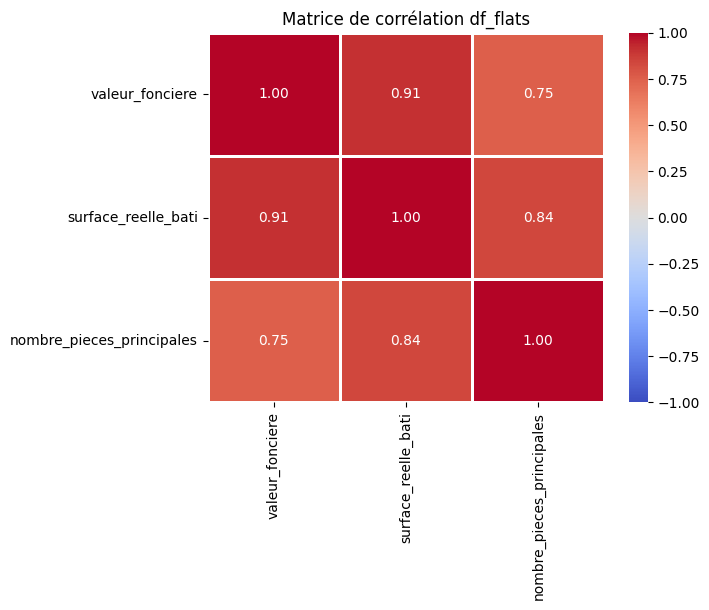

In [51]:
# j'affiche une heatmap permettant de visualiser les corrélations entre les variables

sns.heatmap(data=df_flats.loc[:, ['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales']].corr(),  # sélection des valeurs numériques hors code departement get_dummies
            center=0,  # je centre sur 0
            vmin=-1,  # j'établis le minimum
            vmax=1,  # j'établis le maximum
            annot=True,  # j'insère les valeurs pour chaque corrélation
            fmt='.2f',  # je réduis le noimbre de décimales
            linewidth=1,  # écart entre les cases ==> meilleurs lisibilité
            cmap='coolwarm'  # choix de la palette de couleur
            )

plt.title("Matrice de corrélation df_flats")  # affichage du titre
plt.show()

**Réponse :**
- les deux variables les plus corrélées à valeur foncière (y) sont:
- 1/ "surface_reelle_bati" avec une corrélation positive forte de 0.91 ==> plus un bien à une surface grande, plus le prix est élevé
- 2/ "nombre_pieces_principales" avec une corrélation positive forte de 0.75 ==> plus le nombre de pièces principales est élevée, plus ke prix est élevé


### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [52]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(3)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison
1,141270.0,48,2,appartement
2,117000.0,38,1,appartement


In [53]:
df_ml_idf.shape

(112583, 4)

In [54]:
df_ml_idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112583 entries, 0 to 112582
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   valeur_fonciere            112583 non-null  float64
 1   surface_reelle_bati        112583 non-null  int64  
 2   nombre_pieces_principales  112583 non-null  int64  
 3   type_local                 112583 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.4+ MB


In [55]:
df_ml_idf.isna().sum()

valeur_fonciere              0
surface_reelle_bati          0
nombre_pieces_principales    0
type_local                   0
dtype: int64

In [56]:
df_ml_idf['type_local'].value_counts()

type_local
maison         61381
appartement    51202
Name: count, dtype: int64

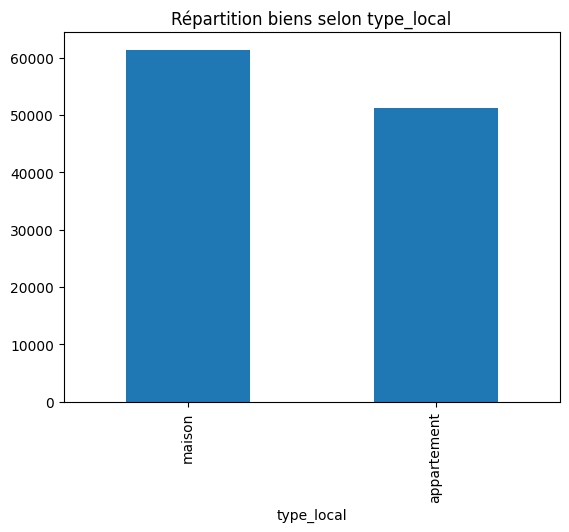

In [57]:
df_ml_idf['type_local'].value_counts().plot(kind='bar')
plt.title('Répartition biens selon type_local')
plt.show()

> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [58]:
# je sélectionne les variables explicatives via mon X
X = df_ml_idf[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales']]

# je vérifie mon X
X.shape

(112583, 3)

In [59]:
# je sélectionne ma variable cible (y)
y = df_ml_idf['type_local']

# je vérifie mon y
y.shape

(112583,)

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [60]:
# train/ test
# X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# je vérifie au préalable lequel des deux modèles de classification est le plus performant
# pour cela je crée une boucle for
# je suis les étapes classiques : train test split / fit du modele / score du modele

list_models = [DecisionTreeClassifier(), KNeighborsClassifier()]

for model in list_models:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    model.fit(X_train, y_train)
    display(f"le modèle {model} : accuracy score = {model.score(X_test, y_test):.3f}")

'le modèle DecisionTreeClassifier() : accuracy score = 0.781'

'le modèle KNeighborsClassifier() : accuracy score = 0.793'

- je choisis le modele KNeighborsClassifier car il a un meilleur score: 0.793

> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [63]:
# je déclare mon modèle
model_KNC = KNeighborsClassifier()
model_KNC

KNeighborsClassifier()

In [64]:
# j'entraine mon modèle
model_KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
# j'évalue les performances sur le jeu de test
model_KNC.score(X_test, y_test)

0.7925104810630285

**Réponse :**
- pour un modele de classification, la notion de score renvoie à l'accuracy score, c'est la mesure qui permet d'évaluer l'exactitude de notre modele
- notre accuracy score pour KNeighborsClassifier est de 0.793
- cela signifie que notre modele a bien prédit 79 fois sur 100

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

**Réponse :**
- notre modèle a un accuracy score de 0.793 (ce qui est plutôt robuste pour commencer)
- néanmoins notre modèle pourrait être améliorer:
- 1. avec une standardisation des données en amont du train test split (standardscaler)
- 2. une cross validation pourrait être nécessaire également afin de multiplier les train test split
- 3. en jouant sur les hyperparamètres afin de gagner en performances

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

**Réponse :**


In [66]:
# import de la bibliotheque
from sklearn.metrics import confusion_matrix

In [67]:
# syntaxe pour afficher la matrice de confusion

pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=model_KNC.predict(X_test)),
             index=model_KNC.classes_ + " ACTUAL",
             columns=model_KNC.classes_ + " PREDICTED")

,appartement PREDICTED,maison PREDICTED
appartement ACTUAL,9769,3045
maison ACTUAL,2795,12537


- commentaires Matrice de Confusion:
- APPARTEMENTS
- le modele a prédit 9 769 appartement qui sont réellement des appartements
- le modele a prédit  2 795 appartements qui sont en réalite des maisons
*******
- MAISONS
- le modèle a prédit 3 045 maisons qui sont en réalité des appartements
- le modèle a prédit 12 537 maisons qui sont réellement des maisons

- affichage de classification report

In [68]:
from sklearn.metrics import classification_report

In [69]:
# l'objectif ici est de comparer y_test et y_pred

print(classification_report(y_test, y_pred=model_KNC.predict(X_test)))

              precision    recall  f1-score   support

 appartement       0.78      0.76      0.77     12814
      maison       0.80      0.82      0.81     15332

    accuracy                           0.79     28146
   macro avg       0.79      0.79      0.79     28146
weighted avg       0.79      0.79      0.79     28146



- metrique precision ==> indique combien de fois la prédiction est correcte
- appartement = 0.78
- ==> cela signifie 78% des biens prédits comme appartements étaient correcte
- maison = 0.80
- ==> cela signifie que 80% des biens prédits comme maisons étaient correcte
*****
- metrique recall ==> indique parmi les "vraies" maisons et appartements, combien ont été correctement identifiés
- appartement = 0.76, soit 76% des vrais appartements ont bien été identifé par le modèle
- maison = 0.82, soit 82% des vraies maisons ont bien été identifié par le modèle
*****
- ces deux métriques nous permettent d'affirmer que notre modèle est robuste mais qu'il pourrait être améliorer


# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

In [70]:
bouteille_client = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv')
bouteille_client

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [71]:
bouteille_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1 non-null      object 
 1   description            1 non-null      object 
 2   designation            0 non-null      float64
 3   points                 1 non-null      int64  
 4   price                  0 non-null      float64
 5   province               1 non-null      object 
 6   region_1               1 non-null      object 
 7   region_2               0 non-null      float64
 8   taster_name            1 non-null      object 
 9   taster_twitter_handle  1 non-null      object 
 10  title                  1 non-null      object 
 11  variety                1 non-null      object 
 12  winery                 1 non-null      object 
dtypes: float64(3), int64(1), object(9)
memory usage: 236.0+ bytes


In [72]:
bouteille_client['description']

0    Firm and solid with great swathes of black fru...
Name: description, dtype: object

In [73]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df_wine = pd.read_csv(link)

df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# DF_WINE: je commence mon exploration et mon netoyage du dataset (contenant les 130K vins) en PYTHON 

In [74]:
fn_exploration(df_wine)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


None

'valeurs manquantes'

country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

'describe'

,points,price
count,129957.000000,120964.000000
mean,88.446655,36.390827
std,3.039481,32.802430
min,80.000000,2.000000
25%,86.000000,21.000000
50%,88.000000,29.000000
75%,91.000000,42.000000
max,100.000000,1902.000000


'dtypes'

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

'value_counts'

country  description                                                                                                                                                                                                                                                                                                                                                         designation                       points  price  province    region_1              region_2           taster_name       taster_twitter_handle  title                                                                          variety                winery            
US       Tight and nicely constructed, this is not afraid to show its herbal side. Tannins are earthy and firm, the fruit tight and focused, and the wine might benefit from a few more years in the bottle. What's already there is cassis, tar and earth, finishing with a light but balanced fade.                                                                        The Es

'duplicates'

9982

'decribe corr'

,points,price
points,1.000000,0.999885
price,0.999885,1.000000


- je m'occupe des doublons

In [75]:
# je vérifie les doublons
f"il y a {df_wine.duplicated().sum()} doublons dans le df_wine"

'il y a 9982 doublons dans le df_wine'

In [76]:
# j'affiche les lignes en doublons
df_wine[df_wine.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",NaN,85,17.0,California,North Coast,North Coast,Virginie Boone,@vboone,Souverain 2016 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,Sallier de la Tour,85,16.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Tasca d'Almerita 2017 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita
2410,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,16.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Tres Palacios 2017 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2412,Italy,The Monica grape often shows a rustic or raw q...,Dolia,85,17.0,Sicily & Sardinia,Monica di Sardegna,NaN,NaN,NaN,Cantine di Dolianova 2016 Dolia (Monica di Sa...,Monica,Cantine di Dolianova
2413,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'Amélie,85,17.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,Château de Sours 2017 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129865,US,"This wine is a blend of 45% Grenache, 37% Syra...",Metis,90,26.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Maison Bleue 2019 Metis Red (Columbia Valley (...,Red Blend,Maison Bleue
129866,US,Apple blossom intrigues on the nose of this li...,NaN,90,23.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Martin Ray 2021 Chardonnay (Russian River Valley),Chardonnay,Martin Ray
129867,Spain,This Verdejo smells like citrus fruits and wil...,NaN,90,23.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Martinsancho 2021 Verdejo (Rueda),Verdejo,Martinsancho
129868,US,"This wine is mostly Cabernet Sauvignon (78%), ...",Reserve,90,47.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Matthews 2018 Reserve Red (Columbia Valley (WA)),Bordeaux-style Red Blend,Matthews


In [77]:
# je choisis de supprimer les doublons en conservant la première entrée
# j'utilise donc keep=first avec .drop.duplicates
# inplace=True pour enregistrer la suppression des doublons dans le dataset

df_wine.drop_duplicates(keep='first', inplace=True)

In [78]:
# je vérifie qu'il n'y a plus de doublons dans df_wine
df_wine[df_wine.duplicated()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


- j'explore les colonnes

In [79]:
# je crée une fonctiopn d'exploration pour les colonnes
def fn_explo_colonne(column_name):
    display(
        f"valeurs manquantes",
        df_wine[column_name].isna().sum(),
        f"value counts",
        df_wine[column_name].value_counts(),
        f"% value counts",
        df_wine[column_name].value_counts(normalize=True)*100,
        f"valeurs uniques",
        df_wine[column_name].unique()       
    )

- colonne country

In [80]:
fn_explo_colonne('country')

'valeurs manquantes'

59

'value counts'

country
US                        50457
France                    20340
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4184
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14


'% value counts'

country
US                        42.076954
France                    16.961873
Italy                     14.960472
Spain                      5.100237
Portugal                   4.383068
Chile                      3.489109
Argentina                  2.955402
Austria                    2.530104
Australia                  1.832116
Germany                    1.661163
South Africa               1.084926
New Zealand                1.065746
Israel                     0.388605
Greece                     0.360252
Canada                     0.188465
Bulgaria                   0.110077
Hungary                    0.107575
Romania                    0.085060
Uruguay                    0.081724
Turkey                     0.067547
Slovenia                   0.064212
Georgia                    0.063378
Croatia                    0.058374
Mexico                     0.056706
England                    0.052537
Moldova                    0.046699
Brazil                     0.040862
Lebanon             

'valeurs uniques'

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

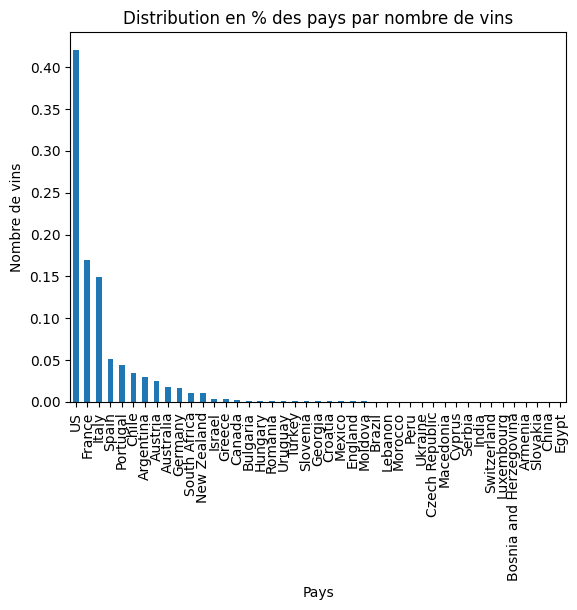

In [81]:
df_wine['country'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution en % des pays par nombre de vins')
plt.xlabel('Pays')
plt.ylabel('Nombre de vins')
plt.show()

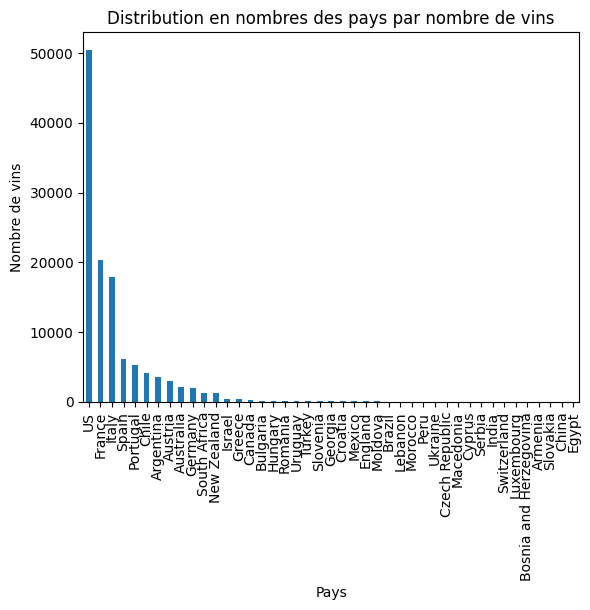

In [82]:
df_wine['country'].value_counts().plot(kind='bar')
plt.title('Distribution en nombres des pays par nombre de vins')
plt.xlabel('Pays')
plt.ylabel('Nombre de vins')
plt.show()

- colonne designation

In [83]:
fn_explo_colonne('designation')

'valeurs manquantes'

34541

'value counts'

designation
Reserve                          1871
Estate                           1223
Reserva                          1176
Riserva                           647
Estate Grown                      567
                                 ... 
Champs-Pimont Premier Cru           1
Diamant Blanc Blanc de Blancs       1
Cuvée Raventos                      1
Brut Reserve Natural                1
Lieu-dit Harth Cuvée Caroline       1
Name: count, Length: 37975, dtype: int64

'% value counts'

designation
Reserve                          2.189995
Estate                           1.431514
Reserva                          1.376501
Riserva                          0.757310
Estate Grown                     0.663670
                                   ...   
Champs-Pimont Premier Cru        0.001170
Diamant Blanc Blanc de Blancs    0.001170
Cuvée Raventos                   0.001170
Brut Reserve Natural             0.001170
Lieu-dit Harth Cuvée Caroline    0.001170
Name: proportion, Length: 37975, dtype: float64

'valeurs uniques'

array(['Vulkà Bianco', 'Avidagos', nan, ...,
       'Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec', 'Irongate',
       'Lieu-dit Harth Cuvée Caroline'], dtype=object)

In [84]:
# recherche des valeurs manquantes colonne designation
df_wine['designation'].isna().sum()

34541

- colonne points

In [85]:
fn_explo_colonne('points')

'valeurs manquantes'

0

'value counts'

points
88     15291
87     15279
90     13891
86     11526
89     11147
91     10559
85      9067
92      8949
84      6225
93      6168
94      3621
83      2963
82      1814
95      1511
81       689
96       521
80       397
97       228
98        77
99        33
100       19
Name: count, dtype: int64

'% value counts'

points
88     12.745155
87     12.735153
90     11.578245
86      9.607001
89      9.291102
91      8.801000
85      7.557408
92      7.459054
84      5.188581
93      5.141071
94      3.018129
83      2.469681
82      1.511982
95      1.259429
81      0.574286
96      0.434257
80      0.330902
97      0.190040
98      0.064180
99      0.027506
100     0.015837
Name: proportion, dtype: float64

'valeurs uniques'

array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80, 100,
        98,  97,  96,  95,  93,  94,  84,  99], dtype=int64)

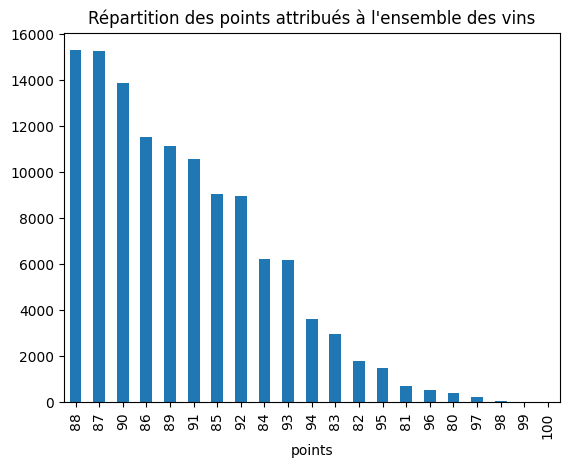

In [86]:
df_wine['points'].value_counts().plot(kind='bar')
plt.title("Répartition des points attribués à l'ensemble des vins")
plt.show()

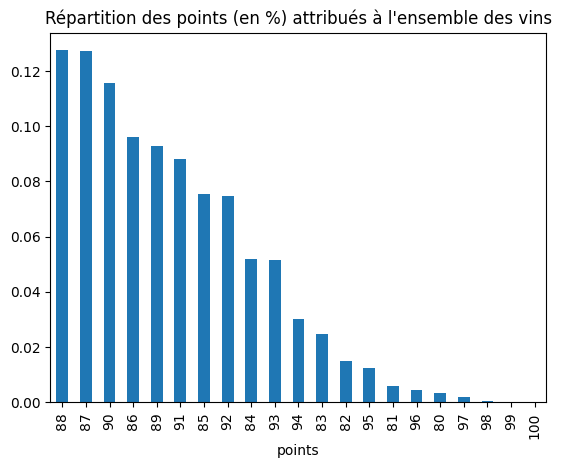

In [87]:
df_wine['points'].value_counts(normalize=True).plot(kind='bar')
plt.title("Répartition des points (en %) attribués à l'ensemble des vins")
plt.show()

In [88]:
print(f" moyenne points des vins: {df_wine['points'].mean()}")
print(f" mediane points des vins: {df_wine['points'].median()}")
print(f" minimum points des vins: {df_wine['points'].min()}")
print(f" maximum points des vins: {df_wine['points'].max()}")

 moyenne points des vins: 88.44172535944989
 mediane points des vins: 88.0
 minimum points des vins: 80
 maximum points des vins: 100


In [89]:
df_wine['points'].describe().to_frame()

,points
count,119975.000000
mean,88.441725
std,3.092646
min,80.000000
25%,86.000000
50%,88.000000
75%,91.000000
max,100.000000


- colonne price

In [90]:
fn_explo_colonne('price')

'valeurs manquantes'

8392

'value counts'

price
24.0     3813
21.0     3778
18.0     3605
23.0     3557
22.0     3494
         ... 
564.0       1
540.0       1
314.0       1
315.0       1
276.0       1
Name: count, Length: 449, dtype: int64

'% value counts'

price
24.0     3.417187
21.0     3.385820
18.0     3.230779
23.0     3.187762
22.0     3.131301
           ...   
564.0    0.000896
540.0    0.000896
314.0    0.000896
315.0    0.000896
276.0    0.000896
Name: proportion, Length: 449, dtype: float64

'valeurs uniques'

array([  nan,   20.,   18.,   44.,   19.,   24.,   17.,   25.,   23.,
         27.,   29.,   22.,   31.,   28.,   21.,   36.,   51.,   16.,
         41.,   15.,   35.,   54.,   91.,   30.,   87.,   43.,   38.,
         13.,   32.,   46.,   49.,   47.,  100.,   95.,   50.,   52.,
         55.,   60.,   67.,   58.,   93.,   34.,   82.,   90.,   72.,
        108.,   65.,   85.,   56.,   61.,   53.,   42.,   33.,   66.,
         57.,   37.,   45.,   26.,   40.,   94.,   48.,   39.,  141.,
         99.,   69.,   64.,   10.,    7.,    9.,   14.,    6.,  524.,
        521.,  320.,  169.,  123.,  327.,  263.,  164.,   63.,  179.,
         88.,  126.,  168.,  238.,   71.,  117.,  160.,   62.,  110.,
         81.,  101.,   78.,   74.,  106.,   59.,   73.,   77.,   11.,
         12.,   79.,   68.,  107.,  113.,   86.,  134.,  121.,   92.,
         84.,   80.,  103.,  104.,   76.,  130.,   89.,   70.,   97.,
       1337.,  292.,  146.,  194.,  190.,  132.,  785.,  220.,  165.,
         83.,  852.,

In [91]:
df_wine['price'].describe().to_frame()

,price
count,111583.000000
mean,36.720092
std,33.611120
min,2.000000
25%,21.000000
50%,29.000000
75%,43.000000
max,1902.000000


In [92]:
# df_transactions = df_transactions.drop(
#                 df_transactions[df_transactions['surface_reelle_bati'] > 6000].index
#                 )

In [93]:
# je supprime le vin au prix de 2
df_wine = df_wine.drop(df_wine[df_wine['price'] == 2].index)

In [94]:
# je vérifie que la suppression est bien été enregistré
df_wine[df_wine['price'] == 2]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


<Axes: ylabel='price'>

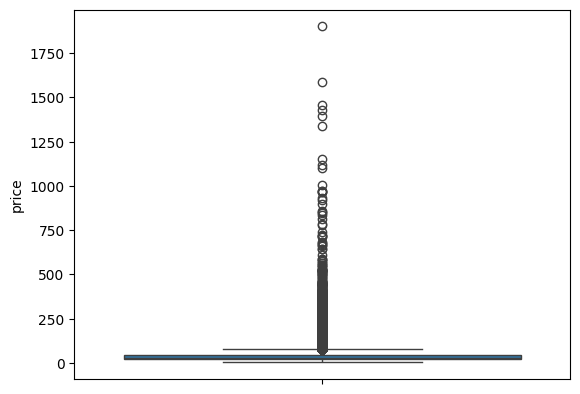

In [95]:
sns.boxplot(data=df_wine['price'])

- colonne province

In [96]:
fn_explo_colonne('province')

'valeurs manquantes'

59

'value counts'

province
California        33656
Washington         7965
Bordeaux           5556
Tuscany            5391
Oregon             4929
                  ...  
Markopoulo            1
Paardeberg            1
Krania Olympus        1
Corinthia             1
Neuchâtel             1
Name: count, Length: 425, dtype: int64

'% value counts'

province
California        28.066547
Washington         6.642205
Bordeaux           4.633282
Tuscany            4.495684
Oregon             4.110412
                    ...    
Markopoulo         0.000834
Paardeberg         0.000834
Krania Olympus     0.000834
Corinthia          0.000834
Neuchâtel          0.000834
Name: proportion, Length: 425, dtype: float64

'valeurs uniques'

array(['Sicily & Sardinia', 'Douro', 'Oregon', 'Michigan',
       'Northern Spain', 'Alsace', 'Rheinhessen', 'California', 'Mosel',
       'Other', 'Mendoza Province', 'Virginia', 'Beaujolais',
       'Colchagua Valley', 'Southern Italy', 'Maule Valley', 'Bordeaux',
       'Maipo Valley', 'Washington', 'Central Italy', 'Champagne',
       'Burgundy', 'South Australia', 'Tejo', 'Rapel Valley', 'Galicia',
       'France Other', 'Tuscany', 'Burgenland', 'New York',
       'Leyda Valley', 'Piedmont', 'Stellenbosch',
       'Simonsberg-Stellenbosch', 'Walker Bay', 'Alentejano',
       'Central Spain', 'Southwest France', 'Aconcagua Valley',
       'Loncomilla Valley', 'Marlborough', 'Northeastern Italy',
       'Casablanca Valley', 'Veneto', 'Western Cape', 'Judean Hills',
       'Alentejo', 'Coastal Region', 'Rhône Valley', 'Galilee',
       'Beira Atlantico', 'Tokaj', 'Leithaberg', 'Santorini', 'Kremstal',
       'Catalonia', 'Recas', "Hawke's Bay", 'Curicó Valley',
       'Limarí Valley'

- colonne taster name

In [97]:
fn_explo_colonne('taster_name')

'valeurs manquantes'

24917

'value counts'

taster_name
Roger Voss            23547
Michael Schachner     14045
Kerin O’Keefe          9697
Paul Gregutt           8868
Virginie Boone         8708
Matt Kettmann          5730
Joe Czerwinski         4766
Sean P. Sullivan       4461
Anna Lee C. Iijima     4017
Jim Gordon             3766
Anne Krebiehl MW       3290
Lauren Buzzeo          1700
Susan Kostrzewa        1023
Mike DeSimone           461
Jeff Jenssen            436
Alexander Peartree      383
Carrie Dykes            129
Fiona Adams              24
Christina Pickard         6
Name: count, dtype: int64

'% value counts'

taster_name
Roger Voss            24.771453
Michael Schachner     14.775345
Kerin O’Keefe         10.201248
Paul Gregutt           9.329139
Virginie Boone         9.160819
Matt Kettmann          6.027962
Joe Czerwinski         5.013834
Sean P. Sullivan       4.692974
Anna Lee C. Iijima     4.225886
Jim Gordon             3.961833
Anne Krebiehl MW       3.461081
Lauren Buzzeo          1.788401
Susan Kostrzewa        1.076196
Mike DeSimone          0.484972
Jeff Jenssen           0.458672
Alexander Peartree     0.402916
Carrie Dykes           0.135708
Fiona Adams            0.025248
Christina Pickard      0.006312
Name: proportion, dtype: float64

'valeurs uniques'

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

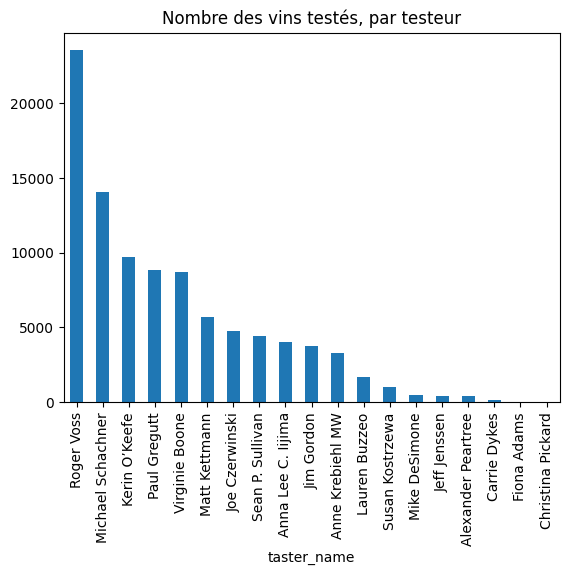

In [98]:
df_wine['taster_name'].value_counts().plot(kind='bar')
plt.title('Nombre des vins testés, par testeur')
plt.show()

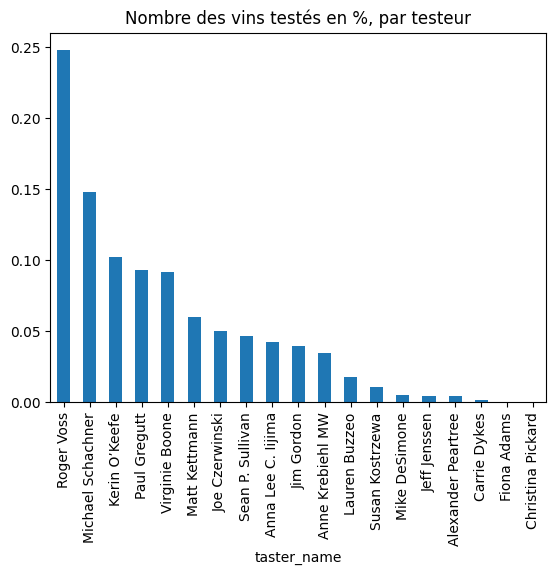

In [99]:
df_wine['taster_name'].value_counts(normalize=True).plot(kind='bar')
plt.title('Nombre des vins testés en %, par testeur')
plt.show()

- colonne region 1

In [100]:
fn_explo_colonne('region_1')

'valeurs manquantes'

19560

'value counts'

region_1
Napa Valley                                          4174
Columbia Valley (WA)                                 3795
Russian River Valley                                 2862
California                                           2468
Paso Robles                                          2155
                                                     ... 
California-Oregon                                       1
Colline Teramane                                        1
Vino de la Tierra Ribera del Gállego-Cinco Villas       1
Martina                                                 1
Paestum                                                 1
Name: count, Length: 1228, dtype: int64

'% value counts'

region_1
Napa Valley                                          4.156791
Columbia Valley (WA)                                 3.779353
Russian River Valley                                 2.850200
California                                           2.457825
Paso Robles                                          2.146115
                                                       ...   
California-Oregon                                    0.000996
Colline Teramane                                     0.000996
Vino de la Tierra Ribera del Gállego-Cinco Villas    0.000996
Martina                                              0.000996
Paestum                                              0.000996
Name: proportion, Length: 1228, dtype: float64

'valeurs uniques'

array(['Etna', nan, 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

- colonne region 2

In [101]:
fn_explo_colonne('region_2')

'valeurs manquantes'

73205

'value counts'

region_2
Central Coast        10233
Sonoma                8390
Columbia Valley       7466
Napa                  6369
Willamette Valley     3142
California Other      2499
Finger Lakes          1642
Sierra Foothills      1345
Napa-Sonoma           1084
Central Valley         992
Southern Oregon        840
Oregon Other           671
Long Island            609
North Coast            534
Washington Other       497
South Coast            251
New York Other         205
Name: count, dtype: int64

'% value counts'

region_2
Central Coast        21.879878
Sonoma               17.939233
Columbia Valley      15.963566
Napa                 13.617995
Willamette Valley     6.718125
California Other      5.343283
Finger Lakes          3.510873
Sierra Foothills      2.875837
Napa-Sonoma           2.317775
Central Valley        2.121063
Southern Oregon       1.796061
Oregon Other          1.434711
Long Island           1.302145
North Coast           1.141782
Washington Other      1.062670
South Coast           0.536680
New York Other        0.438325
Name: proportion, dtype: float64

'valeurs uniques'

array([nan, 'Willamette Valley', 'Napa', 'Sonoma', 'Central Coast',
       'Oregon Other', 'Central Valley', 'North Coast', 'Columbia Valley',
       'California Other', 'Finger Lakes', 'Sierra Foothills',
       'New York Other', 'Long Island', 'Napa-Sonoma', 'Southern Oregon',
       'Washington Other', 'South Coast'], dtype=object)

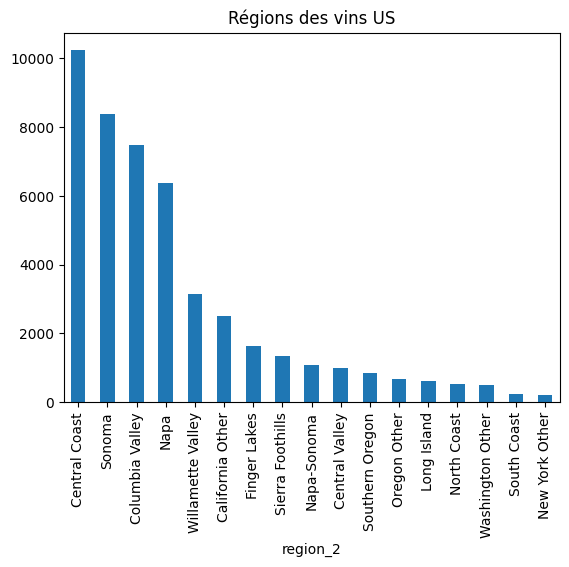

In [102]:
df_wine['region_2'].value_counts().plot(kind='bar')
plt.title('Régions des vins US')
plt.show()

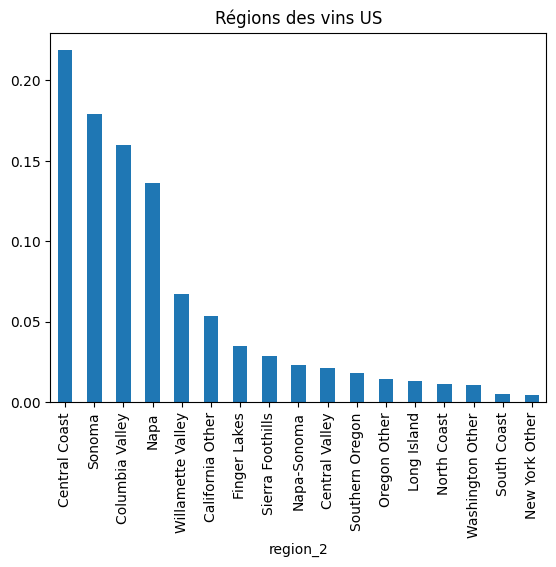

In [103]:
df_wine['region_2'].value_counts(normalize=True).plot(kind='bar')
plt.title('Régions des vins US')
plt.show()

- colonne taster_twitter_handle

In [104]:
fn_explo_colonne('taster_twitter_handle')

'valeurs manquantes'

29446

'value counts'

taster_twitter_handle
@vossroger          23547
@wineschach         14045
@kerinokeefe         9697
@paulgwine           8868
@vboone              8708
@mattkettmann        5730
@JoeCz               4766
@wawinereport        4461
@gordone_cellars     3766
@AnneInVino          3290
@laurbuzz            1700
@suskostrzewa        1023
@worldwineguys        897
@bkfiona               24
@winewchristina         6
Name: count, dtype: int64

'% value counts'

taster_twitter_handle
@vossroger          26.010737
@wineschach         15.514537
@kerinokeefe        10.711603
@paulgwine           9.795864
@vboone              9.619123
@mattkettmann        6.329533
@JoeCz               5.264669
@wawinereport        4.927757
@gordone_cellars     4.160039
@AnneInVino          3.634235
@laurbuzz            1.877872
@suskostrzewa        1.130037
@worldwineguys       0.990854
@bkfiona             0.026511
@winewchristina      0.006628
Name: proportion, dtype: float64

'valeurs uniques'

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', nan, '@wineschach',
       '@vboone', '@mattkettmann', '@wawinereport', '@gordone_cellars',
       '@JoeCz', '@AnneInVino', '@laurbuzz', '@worldwineguys',
       '@suskostrzewa', '@bkfiona', '@winewchristina'], dtype=object)

- colonne title

In [105]:
fn_explo_colonne('title')

'valeurs manquantes'

0

'value counts'

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         9
Segura Viudas NV Extra Dry Sparkling (Cava)                                    7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                        7
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                                6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)             6
                                                                              ..
Lis Neris 2018 Gris Pinot Grigio (Friuli Isonzo)                               1
Stroblhof 2018 Pigeno Pinot Nero (Alto Adige)                                  1
St. Pauls 2019 Passion Vernatsch Schiava (Alto Adige)                          1
Scott Family 2019 Dijon Clone Pinot Noir (Arroyo Seco)                         1
Domaine Schoffit 2018 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)    1
Name: count, Length: 118826, dtype: int64

'% value counts'

title
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         0.007502
Segura Viudas NV Extra Dry Sparkling (Cava)                                    0.005835
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                        0.005835
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                                0.005001
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)             0.005001
                                                                                 ...   
Lis Neris 2018 Gris Pinot Grigio (Friuli Isonzo)                               0.000834
Stroblhof 2018 Pigeno Pinot Nero (Alto Adige)                                  0.000834
St. Pauls 2019 Passion Vernatsch Schiava (Alto Adige)                          0.000834
Scott Family 2019 Dijon Clone Pinot Noir (Arroyo Seco)                         0.000834
Domaine Schoffit 2018 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)    0.000834
Name: proportion, Length: 

'valeurs uniques'

array(['Nicosia 2019 Vulkà Bianco  (Etna)',
       'Quinta dos Avidagos 2017 Avidagos Red (Douro)',
       'Rainstorm 2019 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2019 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2018 Pinot Gris (Alsace)',
       'Domaine Schoffit 2018 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)'],
      dtype=object)

- colonne variety

In [106]:
fn_explo_colonne('variety')

'valeurs manquantes'

1

'value counts'

variety
Pinot Noir                    12266
Chardonnay                    10867
Cabernet Sauvignon             8840
Red Blend                      8243
Bordeaux-style Red Blend       6471
                              ...  
Cabernet Sauvignon-Barbera        1
Merlot-Shiraz                     1
Folle Blanche                     1
Forcallà                          1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

'% value counts'

variety
Pinot Noir                    10.223967
Chardonnay                     9.057871
Cabernet Sauvignon             7.368325
Red Blend                      6.870713
Bordeaux-style Red Blend       5.393714
                                ...    
Cabernet Sauvignon-Barbera     0.000834
Merlot-Shiraz                  0.000834
Folle Blanche                  0.000834
Forcallà                       0.000834
Bobal-Cabernet Sauvignon       0.000834
Name: proportion, Length: 707, dtype: float64

'valeurs uniques'

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

- colonne winery

In [107]:
fn_explo_colonne('winery')

'valeurs manquantes'

0

'value counts'

winery
Wines & Winemakers     211
Williams Selyem        204
Testarossa             201
DFJ Vinhos             200
Louis Latour           192
                      ... 
Domaine de Montille      1
Johndrow Vineyards       1
Saldo                    1
Montirius                1
Penedo Borges            1
Name: count, Length: 16756, dtype: int64

'% value counts'

winery
Wines & Winemakers     0.175871
Williams Selyem        0.170037
Testarossa             0.167536
DFJ Vinhos             0.166703
Louis Latour           0.160035
                         ...   
Domaine de Montille    0.000834
Johndrow Vineyards     0.000834
Saldo                  0.000834
Montirius              0.000834
Penedo Borges          0.000834
Name: proportion, Length: 16756, dtype: float64

'valeurs uniques'

array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

- je fais le point sur les colonnes qui sont inutiles

In [108]:
df_wine.isna().sum()

country                     59
description                  0
designation              34541
points                       0
price                     8392
province                    59
region_1                 19560
region_2                 73205
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

In [109]:
# j'utilise subset pour supprimer les NaN

df_wine.dropna(subset=['price'], inplace=True)

In [110]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# je m'interesse aux mentions Pinot dans les titres, depuis df_wine

- je crée un df_pinot

In [111]:
df_pinot = df_wine[df_wine['title'].str.contains('Pinot|pinot')]
df_pinot

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,25.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2018 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,21.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2019 Pinot Noir (Oregon),Pinot Noir,Acrobat
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,51.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2017 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129945,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,53.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Cave de Turckheim 2016 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas
129951,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,29.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2019 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation


In [112]:
# je vérifie dans la colonne variety les informations
df_pinot['variety'].unique()

array(['Pinot Gris', 'Pinot Noir', 'Pinot Blanc', 'Pinot Bianco',
       'Pinot Grigio', 'Rosé', 'Pinot Nero', 'Pinotage', 'White Blend',
       'Pinot Meunier', 'Rosado', 'Sparkling Blend', 'Pinot Noir-Gamay',
       'Red Blend', 'Pinot Auxerrois', 'Pinot-Chardonnay',
       'Chardonnay-Pinot Blanc', 'Portuguese Red',
       'Pinot Blanc-Pinot Noir', 'Pinot Gris-Gewürztraminer',
       'Champagne Blend', 'Pinot Noir-Syrah', 'Pinotage-Merlot',
       'Pinot Blanc-Chardonnay', 'Tokay Pinot Gris'], dtype=object)

- je crée un df_pinot_noir pour ne sélectionner que les pinot noir

In [113]:
# je ne sélectionne que les mentions Pinot Noir
df_pinot_noir = df_pinot[df_pinot['variety'] == 'Pinot Noir']

In [114]:
fn_exploration(df_pinot_noir)

<class 'pandas.core.frame.DataFrame'>
Index: 10636 entries, 4 to 129953
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                10634 non-null  object 
 1   description            10636 non-null  object 
 2   designation            8012 non-null   object 
 3   points                 10636 non-null  int64  
 4   price                  10636 non-null  float64
 5   province               10634 non-null  object 
 6   region_1               9642 non-null   object 
 7   region_2               8359 non-null   object 
 8   taster_name            7819 non-null   object 
 9   taster_twitter_handle  7620 non-null   object 
 10  title                  10636 non-null  object 
 11  variety                10636 non-null  object 
 12  winery                 10636 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


None

'valeurs manquantes'

country                     2
description                 0
designation              2624
points                      0
price                       0
province                    2
region_1                  994
region_2                 2277
taster_name              2817
taster_twitter_handle    3016
title                       0
variety                     0
winery                      0
dtype: int64

'describe'

,points,price
count,10636.000000,10636.000000
mean,89.320421,39.624201
std,3.179625,16.757944
min,80.000000,4.000000
25%,87.000000,28.000000
50%,90.000000,39.000000
75%,92.000000,48.000000
max,99.000000,365.000000


'dtypes'

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

'value_counts'

country  description                                                                                                                                                                                                                                                                                                                                                                                                                  designation              points  price  province    region_1               region_2           taster_name     taster_twitter_handle  title                                                                          variety     winery             
US       A 100% varietal wine fermented in stainless steel, this is a bright, lively tangle of cherry and orange built around bristling acidity that practically sizzles on the palate. Light-bodied and plenty crisp, it mellows to show length and breadth on the finish.                                                                   

'duplicates'

0

'decribe corr'

,points,price
points,1.000000,0.999553
price,0.999553,1.000000


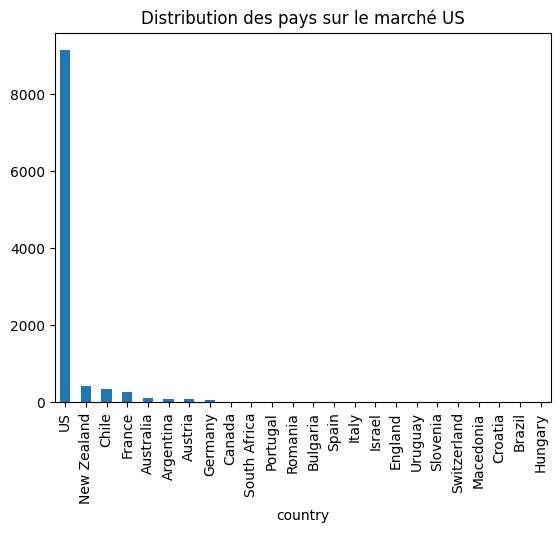

In [115]:
df_pinot_noir['country'].value_counts().plot(kind='bar')
plt.title('Distribution des pays sur le marché US')
plt.show()

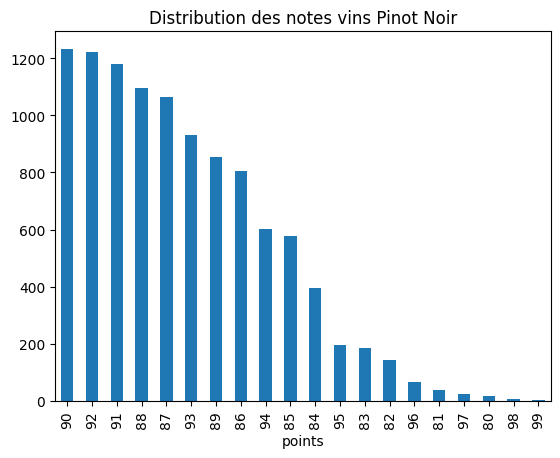

In [116]:
df_pinot_noir['points'].value_counts().plot(kind='bar')
plt.title('Distribution des notes vins Pinot Noir')
plt.show()

- je recherche les mentions Bourgogne dans le df pinot noir

In [117]:
df_pinot_noir[df_pinot_noir['description'].str.contains('Bourgogne|bourgogne')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
233,US,"There is an odd, piercing edge to the aromas, ...",Reserve,85,33.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Silvan Ridge 2012 Reserve Pinot Noir (Willamet...,Pinot Noir,Silvan Ridge
4560,US,"This single vineyard cuvée is quite light, yet...",NaN,85,15.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Rock Point 2020 Pinot Noir (Oregon),Pinot Noir,Rock Point
22188,US,"This is quite light, almost ephemeral, with ta...",Momtazi Vineyard,86,52.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Boedecker Cellars 2011 Momtazi Vineyard Pinot ...,Pinot Noir,Boedecker Cellars
29638,US,"Pinot Noir from Washington? Yes, it's possible...",Underwood Mountain Vineyard,88,40.0,Oregon,Columbia Gorge (OR),Oregon Other,Paul Gregutt,@paulgwine,Viento 2012 Underwood Mountain Vineyard Pinot ...,Pinot Noir,Viento
42043,US,"Light and murky, with a flavor mix of tomato, ...",PH,85,36.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,Purple Hands 2015 PH Pinot Noir (Dundee Hills),Pinot Noir,Purple Hands
45646,US,"Light, tart and slightly mushroomy, this Pinot...",20th Anniversary Reserve,86,30.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Cooper Mountain 2013 20th Anniversary Reserve ...,Pinot Noir,Cooper Mountain
45679,US,"Soft, pretty and pleasant to drink, the widely...",NaN,87,28.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Amity Vineyards 2014 Pinot Noir (Willamette Va...,Pinot Noir,Amity Vineyards
74148,US,From a vineyard in southern Oregon that is act...,Red Hill Vineyard,89,33.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Oak Knoll 2014 Red Hill Vineyard Pinot Noir (O...,Pinot Noir,Oak Knoll
95889,US,"Light and clean, this is a gentle take on Pino...",Oregon,87,26.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2015 Oregon Pinot Noir (Willamette Valley),Pinot Noir,Erath
106283,US,"Light and balanced, this Pinot Noir is from Il...",NaN,87,25.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Foris 2014 Pinot Noir (Oregon),Pinot Noir,Foris


In [118]:
df_pinot_noir[df_pinot_noir['title'].str.contains('Bourgogne|bourgogne')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6652,France,"Good, rich, fruited wine,with lively acidity a...",Pinot Noir Brut,90,52.0,Burgundy,Crémant de Bourgogne,NaN,Roger Voss,@vossroger,Simonnet-Febvre NV Pinot Noir Brut (Crémant d...,Pinot Noir,Simonnet-Febvre
30662,France,"Rich, sweet and soft, with a strawberry jam ch...",Bourgogne Pinot Noir,85,29.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Alex Gambal 2015 Bourgogne Pinot Noir (Bourgo...,Pinot Noir,Alex Gambal
116794,France,"This lightweight red is on the herbal side, al...",Bourgogne Pinot Noir,84,18.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2015 Bourgogne Pinot Noir (Bo...,Pinot Noir,Simonnet-Febvre
127553,France,Bailly Lapierre regards this full-bodied rich ...,Pinot Noir Brut,91,52.0,Burgundy,Crémant de Bourgogne,NaN,Roger Voss,@vossroger,Bailly-Lapierre NV Pinot Noir Brut (Crémant d...,Pinot Noir,Bailly-Lapierre


In [119]:
df_pinot_noir[df_pinot_noir['province'] == 'Burgundy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6652,France,"Good, rich, fruited wine,with lively acidity a...",Pinot Noir Brut,90,52.0,Burgundy,Crémant de Bourgogne,NaN,Roger Voss,@vossroger,Simonnet-Febvre NV Pinot Noir Brut (Crémant d...,Pinot Noir,Simonnet-Febvre
30662,France,"Rich, sweet and soft, with a strawberry jam ch...",Bourgogne Pinot Noir,85,29.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Alex Gambal 2015 Bourgogne Pinot Noir (Bourgo...,Pinot Noir,Alex Gambal
87978,France,The wine has layers of the acidity typical of ...,Buissonnier Pinot Noir,85,14.0,Burgundy,Côte Chalonnaise,NaN,Roger Voss,@vossroger,Vignerons de Buxy 2020 Buissonnier Pinot Noir ...,Pinot Noir,Vignerons de Buxy
116794,France,"This lightweight red is on the herbal side, al...",Bourgogne Pinot Noir,84,18.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2015 Bourgogne Pinot Noir (Bo...,Pinot Noir,Simonnet-Febvre
127553,France,Bailly Lapierre regards this full-bodied rich ...,Pinot Noir Brut,91,52.0,Burgundy,Crémant de Bourgogne,NaN,Roger Voss,@vossroger,Bailly-Lapierre NV Pinot Noir Brut (Crémant d...,Pinot Noir,Bailly-Lapierre


In [120]:
df_pinot_noir[df_pinot_noir['region_1'] == 'Bourgogne']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
30662,France,"Rich, sweet and soft, with a strawberry jam ch...",Bourgogne Pinot Noir,85,29.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Alex Gambal 2015 Bourgogne Pinot Noir (Bourgo...,Pinot Noir,Alex Gambal
116794,France,"This lightweight red is on the herbal side, al...",Bourgogne Pinot Noir,84,18.0,Burgundy,Bourgogne,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2015 Bourgogne Pinot Noir (Bo...,Pinot Noir,Simonnet-Febvre


- il y  a tres peu de mentions de Bourgogne ou Burgundy dans le df pinot noir

- recherche de la date 2016 dans le df_pinot_noir

In [121]:
df_pinot_noir[df_pinot_noir['title'].str.contains('2016')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
35,US,As with many of the Erath 2014 vineyard design...,Hyland,86,41.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2016 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
343,Chile,"Jumpy on the nose at first, but then green tea...",Grand Reserve,81,14.0,Rapel Valley,NaN,NaN,Michael Schachner,@wineschach,Pura 8 2016 Grand Reserve Pinot Noir (Rapel Va...,Pinot Noir,Pura 8
467,US,"Dense, dark and spicy, this opens with a thick...",Evenstad Reserve,92,61.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Domaine Serene 2016 Evenstad Reserve Pinot Noi...,Pinot Noir,Domaine Serene
482,US,The alcohol is nice and low in this dry Pinot ...,Ocean's Ghost,87,49.0,California,Sta. Rita Hills,Central Coast,NaN,NaN,Babcock 2016 Ocean's Ghost Pinot Noir (Sta. Ri...,Pinot Noir,Babcock
498,US,"There are lot's of cherry, cola, sandalwood an...",Annabella,87,23.0,California,Carneros,Napa-Sonoma,NaN,NaN,Michael Pozzan 2016 Annabella Pinot Noir (Carn...,Pinot Noir,Michael Pozzan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128294,US,"A big, rich, fruity, oaky Pinot Noir, offering...",Bien Nacido Vineyard,90,40.0,California,Santa Maria Valley,Central Coast,NaN,NaN,Sandler 2016 Bien Nacido Vineyard Pinot Noir (...,Pinot Noir,Sandler
129348,Austria,"Soft and raspberry-flavored, this has an earth...",NaN,87,24.0,Thermenregion,NaN,NaN,Roger Voss,@vossroger,Johanneshof Reinisch 2016 Pinot Noir (Thermenr...,Pinot Noir,Johanneshof Reinisch
129354,Australia,This wine shows much less oak influence than P...,Pepik,87,27.0,Tasmania,Tasmania,NaN,Joe Czerwinski,@JoeCz,Josef Chromy 2016 Pepik Pinot Noir (Tasmania),Pinot Noir,Josef Chromy
129620,US,"This is the winery's best Pinot since 2011, al...",NaN,90,42.0,California,Russian River Valley,Sonoma,NaN,NaN,B.R. Cohn 2016 Pinot Noir (Russian River Valley),Pinot Noir,B.R. Cohn


In [122]:
# je peux utiliser un regex pouir extraire les dates de millesime depuis la colonne title
df_pinot_noir['title'].str.findall(r'\b\d{4}\b').str[0]

4         2018
21        2019
25        2017
35        2016
41        2015
          ... 
129874    2021
129898    2020
129906    2012
129946    2012
129953    2010
Name: title, Length: 10636, dtype: object

In [123]:
# je crée une nouvelle colonne date millesime pinot noir depuis le regex
df_pinot_noir['date_millesime'] = df_pinot_noir['title'].str.findall(r'\b\d{4}\b').str[0]

C:\Users\aurel\AppData\Local\Temp\ipykernel_26048\4210046136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pinot_noir['date_millesime'] = df_pinot_noir['title'].str.findall(r'\b\d{4}\b').str[0]


In [124]:
df_pinot_noir

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,date_millesime
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,21.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2019 Pinot Noir (Oregon),Pinot Noir,Acrobat,2019
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,51.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2017 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2017
35,US,As with many of the Erath 2014 vineyard design...,Hyland,86,41.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2016 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2016
41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2015 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,US,"Round red cherry, deep plum and ripe cranberry...",NaN,91,29.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,August West 2021 Pinot Noir (Santa Lucia Highl...,Pinot Noir,August West,2021
129898,US,From the Ranch House block of the famous viney...,Durell Vineyard,91,39.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Dunstan 2020 Durell Vineyard Pinot Noir (Sonom...,Pinot Noir,Dunstan,2020
129906,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,61.0,California,Sta. Rita Hills,Central Coast,NaN,NaN,Pali 2012 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali,2012
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012


- il y a deux valeurs aberrantes que je décide de supprimer
- 1791 & 1854

- analyse prix pinot noir

In [125]:
print(f"{df_pinot_noir['price'].mean()}")
print(f"{df_pinot_noir['price'].min()}")
print(f"{df_pinot_noir['price'].max()}")
print(f"{df_pinot_noir['price'].median()}")

39.624200827378715
4.0
365.0
39.0


- analyse notes pinot noir

In [126]:
print(f"{df_pinot_noir['points'].mean()}")
print(f"{df_pinot_noir['points'].min()}")
print(f"{df_pinot_noir['points'].max()}")
print(f"{df_pinot_noir['points'].median()}")

89.32042121098158
80
99
90.0


- export des fichiers pinot noir et wine en csv

In [127]:
df_pinot_noir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10636 entries, 4 to 129953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                10634 non-null  object 
 1   description            10636 non-null  object 
 2   designation            8012 non-null   object 
 3   points                 10636 non-null  int64  
 4   price                  10636 non-null  float64
 5   province               10634 non-null  object 
 6   region_1               9642 non-null   object 
 7   region_2               8359 non-null   object 
 8   taster_name            7819 non-null   object 
 9   taster_twitter_handle  7620 non-null   object 
 10  title                  10636 non-null  object 
 11  variety                10636 non-null  object 
 12  winery                 10636 non-null  object 
 13  date_millesime         10519 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [128]:
df_pinot_noir.to_csv('df_pinot_noir.csv')

In [129]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [130]:
# je crée une nouvelle colonne date millesime depuis le regex
df_wine['date_millesime'] = df_wine['title'].str.findall(r'\b\d{4}\b').str[0]

In [131]:
df_wine

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,date_millesime
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2019
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2019
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,20.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2019
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation,2010
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2019
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2018


In [132]:
df_wine.to_csv('df_wine.csv')

In [133]:
df_wine[df_wine['province'] == 'Burgundy']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,date_millesime
65,France,"From the warm 2019 vintage, this is a soft and...",NaN,86,18.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2021 Chablis,Chardonnay,Simonnet-Febvre,2021
66,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,NaN,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2021 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2021
179,France,The impact of 50-year old vines is seen in the...,Les Vénérables Vieilles Vignes,88,37.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,La Chablisienne 2012 Les Vénérables Vieilles V...,Chardonnay,La Chablisienne,2012
193,France,"A citrus-dominated wine, lime and lemon giving...",NaN,87,43.0,Burgundy,St.-Romain,NaN,Roger Voss,@vossroger,Bertrand Ambroise 2012 St.-Romain,Chardonnay,Bertrand Ambroise,2012
307,France,"Rich and full in the mouth, packed with red fr...",Les Dames Huguettes,87,33.0,Burgundy,Côte de Nuits-Villages,NaN,Roger Voss,@vossroger,Domaine Bertagna 2015 Les Dames Huguettes (Cô...,Pinot Noir,Domaine Bertagna,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129804,France,"Concentrated, with dark tannins to go with the...",Les Damodes,89,94.0,Burgundy,Nuits-St.-Georges,NaN,Roger Voss,@vossroger,Louis Latour 2015 Les Damodes (Nuits-St.-Geor...,Pinot Noir,Louis Latour,2015
129809,France,Aromas of ripe yellow fruits announce a wine t...,NaN,89,64.0,Burgundy,Chassagne-Montrachet,NaN,Roger Voss,@vossroger,Chanson Père et Fils 2014 Chassagne-Montrachet,Chardonnay,Chanson Père et Fils,2014
129811,France,"A fresh, juicy wine, with attractive acidity, ...",NaN,88,36.0,Burgundy,Côte de Beaune-Villages,NaN,Roger Voss,@vossroger,Camille Giroud 2014 Côte de Beaune-Villages,Pinot Noir,Camille Giroud,2014
129917,France,"A powerful, chunky wine, packed with solid tan...",NaN,91,119.0,Burgundy,Grands-Echezeaux,NaN,Roger Voss,@vossroger,Henri de Villamont 2011 Grands-Echezeaux,Pinot Noir,Henri de Villamont,2011


In [134]:
df_burgundy = df_wine[df_wine['province'] == 'Burgundy']

In [135]:
df_burgundy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2862 entries, 65 to 129922
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2862 non-null   object 
 1   description            2862 non-null   object 
 2   designation            1982 non-null   object 
 3   points                 2862 non-null   int64  
 4   price                  2862 non-null   float64
 5   province               2862 non-null   object 
 6   region_1               2857 non-null   object 
 7   region_2               0 non-null      object 
 8   taster_name            2846 non-null   object 
 9   taster_twitter_handle  2846 non-null   object 
 10  title                  2862 non-null   object 
 11  variety                2862 non-null   object 
 12  winery                 2862 non-null   object 
 13  date_millesime         2814 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 335.4+ K

<Axes: xlabel='variety'>

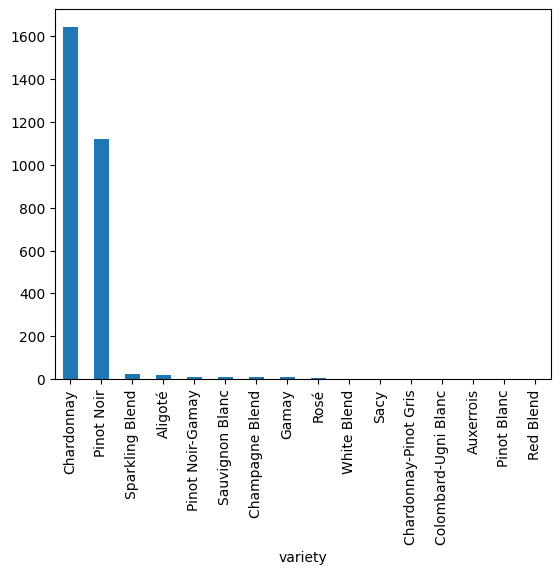

In [136]:
df_burgundy['variety'].value_counts().plot(kind='bar')

In [137]:
df_burgundy.to_csv('df_burgundy.csv')

In [138]:
df_wine[df_wine['variety'] == 'Pinot Noir']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,date_millesime
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,21.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2019 Pinot Noir (Oregon),Pinot Noir,Acrobat,2019
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,51.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2017 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2017
35,US,As with many of the Erath 2014 vineyard design...,Hyland,86,41.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2016 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2016
41,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,25.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2015 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129906,US,"Shows the clean, citrus acid juiciness and sil...",Fiddlestix Vineyard,91,61.0,California,Sta. Rita Hills,Central Coast,NaN,NaN,Pali 2012 Fiddlestix Vineyard Pinot Noir (Sta....,Pinot Noir,Pali,2012
129917,France,"A powerful, chunky wine, packed with solid tan...",NaN,91,119.0,Burgundy,Grands-Echezeaux,NaN,Roger Voss,@vossroger,Henri de Villamont 2011 Grands-Echezeaux,Pinot Noir,Henri de Villamont,2011
129922,France,A blend from several premier cru vineyards in ...,Premier Cru,91,81.0,Burgundy,Pommard,NaN,Roger Voss,@vossroger,Bouchard Père & Fils 2011 Premier Cru (Pommard),Pinot Noir,Bouchard Père & Fils,2011
129946,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,59.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2012 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas,2012


In [139]:
df_pinot_noir_final = df_wine[df_wine['variety'] == 'Pinot Noir']

In [140]:
df_pinot_noir_final.to_csv('df_pinot_noir_final.csv')

In [141]:
len(df_wine)

111582

In [142]:
len(df_pinot_noir_final)

11826

In [143]:
len(df_burgundy)

2862

# wordcloud burgundy VS description

In [144]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re

In [145]:
df_burgundy['description']

65        From the warm 2019 vintage, this is a soft and...
66        This soft, rounded wine is ripe with generous ...
179       The impact of 50-year old vines is seen in the...
193       A citrus-dominated wine, lime and lemon giving...
307       Rich and full in the mouth, packed with red fr...
                                ...                        
129804    Concentrated, with dark tannins to go with the...
129809    Aromas of ripe yellow fruits announce a wine t...
129811    A fresh, juicy wine, with attractive acidity, ...
129917    A powerful, chunky wine, packed with solid tan...
129922    A blend from several premier cru vineyards in ...
Name: description, Length: 2862, dtype: object

In [146]:
stopwordsenglish = nltk.corpus.stopwords.words('english')

# cette fonction de nettoyage sert à préparer les mots afin de pouvoir appliquer le modele NLP

def clean(text):

    # je tokenize le texte grâce à word_tokenize avec méthode .lower
    tokens = word_tokenize(text.lower())

    # la méthode stemmer permet de réduire les mots à leur racine ==> couru/ courait/ courir = cour
    # cela donne moins de mots uniques à traiter donc les modèles comprennent mieux les concepts clés
    # attention au 'sur-alignement' ou 'sous-alignement'
    # plus rapide que le lemmatizer mais moins précis
    # il tronque chaque mots sans tenir compte du sens à l'instar du lemmatizer
    # utile pour classifier des documents
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # je declare une liste vide
    tokens_clean = []

    for words in tokens:
        if words not in stopwordsenglish and words.isalpha():
            tokens_clean.append(words)
    # print(tokens_clean)

    return ' '.join(tokens_clean)


In [147]:
test = "I, my name is Aurelien, I am 40 years old"
clean(test)

'name aurelien years old'

In [148]:
df_burgundy['wc'] = df_burgundy['description'].apply(lambda x: clean(x)) 

C:\Users\aurel\AppData\Local\Temp\ipykernel_26048\452387362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_burgundy['wc'] = df_burgundy['description'].apply(lambda x: clean(x))


In [149]:
df_burgundy['wc']

65        warm vintage soft fruity wine open broad white...
66        soft rounded wine ripe generous pear melon fla...
179       impact old vines seen concentrated fruit ripe ...
193       wine lime lemon giving crisp intensity somewha...
307       rich full mouth packed red fruits black cherri...
                                ...                        
129804    concentrated dark tannins go ripe fruit tough ...
129809    aromas ripe yellow fruits announce wine rich f...
129811    fresh juicy wine attractive acidity red berry ...
129917    powerful chunky wine packed solid tannins prom...
129922    blend several premier cru vineyards pommard wi...
Name: wc, Length: 2862, dtype: object

In [150]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

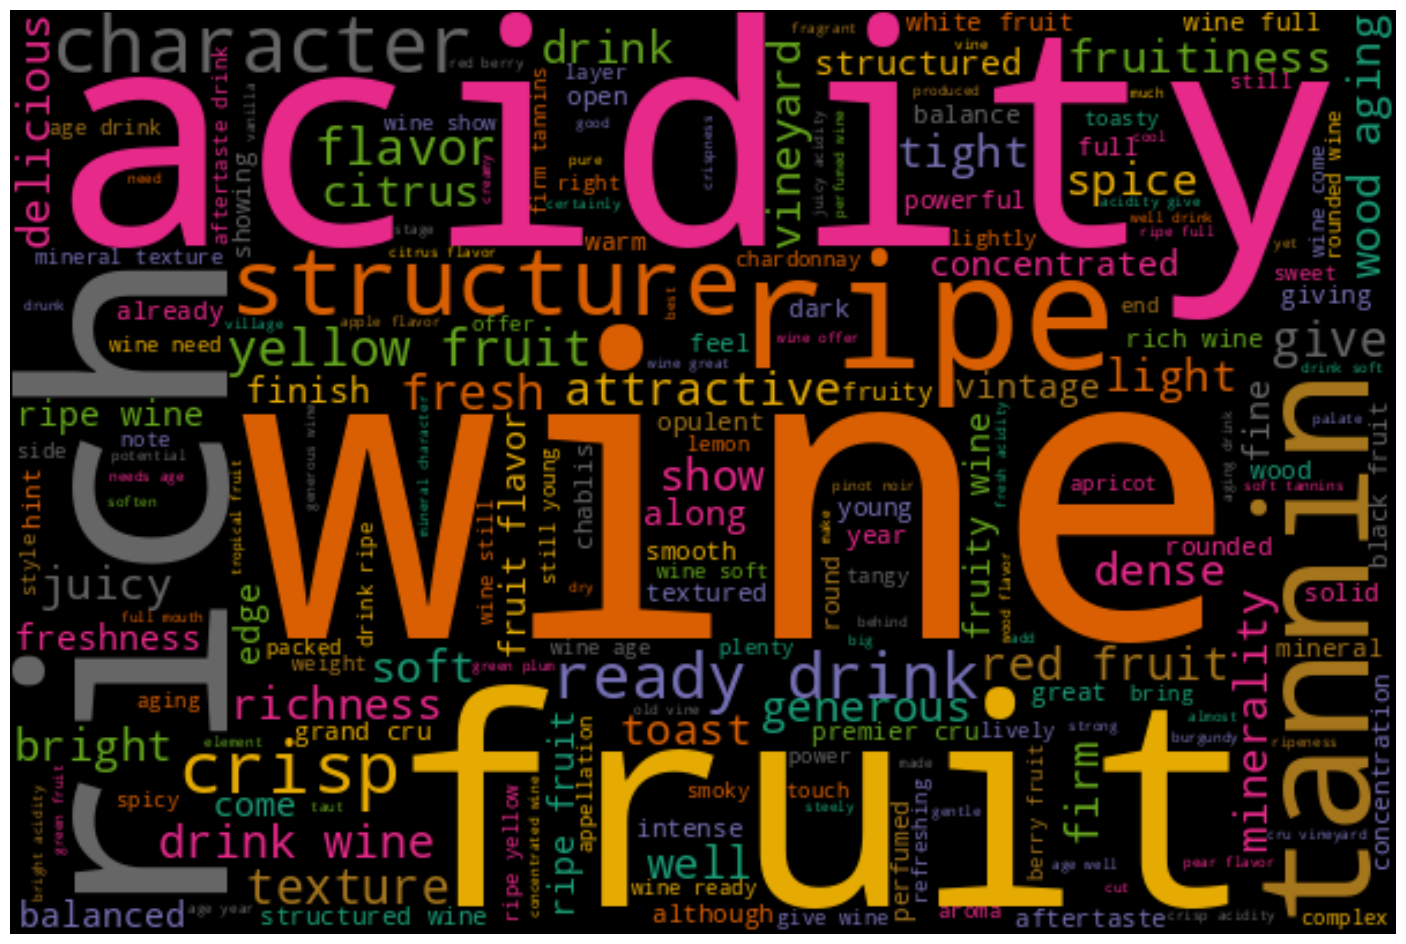

In [151]:
# test wordcloud depuis la colonne description

# je dois sotcker dans une variable la serie de mon dataframe
# l'objectif ici est de pouvoir stocker tous les mots les uns à la suite des autres
# j'utilise donc cette syntaxe .str.cat(sep= ' ') ==> qui permet de concaténer toutes les valeurs d'une série en une seule grande chaine de caractere, séparée par des despaces

words = df_burgundy['wc'].str.cat(sep= ' ')  # sert à concaténer les mots et séparés par des espaces

wordcloud = WordCloud(width=600, height=400, max_words= 200, colormap='Dark2').generate(words)  # on définit la qualité du wordcloud

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [152]:
wordcloud.to_file("burgundy.png")

In [153]:
wc_points = pd.concat([df_burgundy['wc'], df_burgundy['points']], axis=1)

In [154]:
wc_points.to_csv('wc_points.csv')

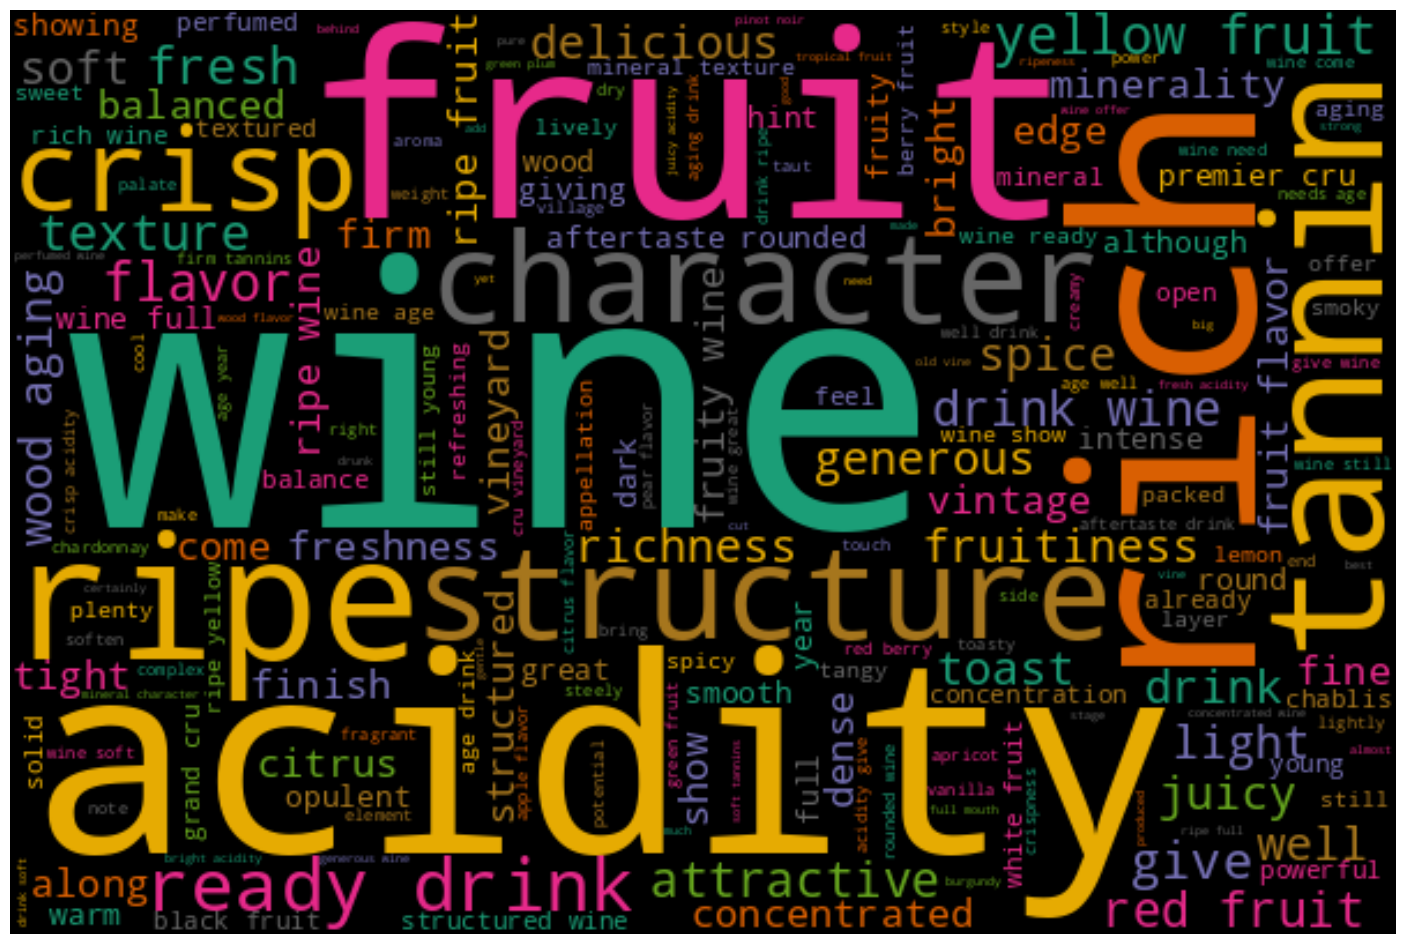

In [155]:
# ce wordcloud est inséré dans power bi afin de pouvoir afficher les mots selon la note

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

words = wc_points['wc'].str.cat(sep= ' ')  # sert à concaténer les mots et séparés par des espaces

wordcloud = WordCloud(width=600, height=400, max_words= 200, colormap='Dark2').generate(words)  # on définit la qualité du wordcloud

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()